In [4]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
!pip install datasets
from datasets import load_dataset, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import json

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


# Zero shot

In [ ]:
# Загрузка предобученной модели
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
# Кандидатные категории
categories = ["Претензия", "Предложение", "Благодарность"]

In [ ]:
# Текст для классификации
text = ["Сервис ужасный, товар доставили с опозданием.",
        "Сервис отличный, товар доставили вовремя!",
        "Сервис ужасный, мне ничего не понравилось, у меня к вас много претензий",
        "Предлагаю вам улучшить качество обслуживания. Как вы смотрите на мои идеи и предложения сотрудничать?",
        "Спасибо большое за такой сервис, я вам очень благодарен! Самый лучший сервис!"]
# Предсказание
result = classifier(text, candidate_labels=categories)
print(*[f'{res["labels"]} : {[round(x, 3) for x in res["scores"]]} <--- {res["sequence"]}' for res in result], sep='\n')

['Претензия', 'Предложение', 'Благодарность'] : [0.345, 0.341, 0.314] <--- Сервис ужасный, товар доставили с опозданием.
['Предложение', 'Претензия', 'Благодарность'] : [0.366, 0.35, 0.284] <--- Сервис отличный, товар доставили вовремя!
['Претензия', 'Предложение', 'Благодарность'] : [0.873, 0.081, 0.046] <--- Сервис ужасный, мне ничего не понравилось, у меня к вас много претензий
['Предложение', 'Претензия', 'Благодарность'] : [0.722, 0.246, 0.032] <--- Предлагаю вам улучшить качество обслуживания. Как вы смотрите на мои идеи и предложения сотрудничать?
['Благодарность', 'Предложение', 'Претензия'] : [0.88, 0.065, 0.055] <--- Спасибо большое за такой сервис, я вам очень благодарен! Самый лучший сервис!


In [ ]:
# Текст для классификации
text = ["Всё плохо", "Предлагаю идею", "Спасибо большое"]
# Предсказание
result = classifier(text, candidate_labels=categories)
print(*[f'{res["labels"]} : {[round(x, 3) for x in res["scores"]]} <--- {res["sequence"]}' for res in result], sep='\n')

['Предложение', 'Благодарность', 'Претензия'] : [0.357, 0.355, 0.287] <--- Всё плохо
['Предложение', 'Претензия', 'Благодарность'] : [0.583, 0.248, 0.169] <--- Предлагаю идею
['Благодарность', 'Предложение', 'Претензия'] : [0.353, 0.337, 0.31] <--- Спасибо большое


In [ ]:
# Текст для классификации
text = categories
# Предсказание
result = classifier(text, candidate_labels=categories)
print(*[f'{res["labels"]} : {[round(x, 3) for x in res["scores"]]} <--- {res["sequence"]}' for res in result], sep='\n')

['Претензия', 'Предложение', 'Благодарность'] : [0.818, 0.134, 0.048] <--- Претензия
['Предложение', 'Претензия', 'Благодарность'] : [0.771, 0.174, 0.055] <--- Предложение
['Благодарность', 'Предложение', 'Претензия'] : [0.797, 0.109, 0.094] <--- Благодарность


In [ ]:
# Текст для классификации
text = ['Добрый день. Недавно узнал, что в Промсвязьбанке проходит акция "мой суперприз". И решил обратится 18 декабря 2024 года в 13-50 в чат банка за подробными разъяснениями по данной акции.'
        'Оператор Карина моментально подключилась к диалогу, вежливо поздоровалась со мной и предоставила мне все необходимые разъяснения по данному вопросу. Также она включила меня в данную акцию непосредственно в чате. А также дала всю необходимую информацию, какой именно я должен открыть вклад и на какой срок, чтобы соблюсти все условия данной акции.'
        'На оставшиеся мои вопросы ответила оператор Вероника и помогла мне окончательно разобраться в данном вопросе. Спасибо большое за оперативную и грамотную консультацию. Сам бы я не разобрался.']
# Предсказание
result = classifier(text, candidate_labels=categories)
print(*[f'{res["labels"]} : {[round(x, 3) for x in res["scores"]]} <--- {res["sequence"]}' for res in result], sep='\n')

['Претензия', 'Предложение', 'Благодарность'] : [0.616, 0.288, 0.096] <--- Добрый день. Недавно узнал, что в Промсвязьбанке проходит акция "мой суперприз". И решил обратится 18 декабря 2024 года в 13-50 в чат банка за подробными разъяснениями по данной акции.Оператор Карина моментально подключилась к диалогу, вежливо поздоровалась со мной и предоставила мне все необходимые разъяснения по данному вопросу. Также она включила меня в данную акцию непосредственно в чате. А также дала всю необходимую информацию, какой именно я должен открыть вклад и на какой срок, чтобы соблюсти все условия данной акции.На оставшиеся мои вопросы ответила оператор Вероника и помогла мне окончательно разобраться в данном вопросе. Спасибо большое за оперативную и грамотную консультацию. Сам бы я не разобрался.


In [ ]:
# Текст для классификации
text = ['Добрый день!'
        'Хочу выразить искреннюю благодарность сотруднику Р-вой Марии Б. - управляющему ДО «Победа» в г. Самара по адресу ул. Победы, д. 92 за ее компетентность, доброжелательность, за неравнодушие и умение работать с клиентами.'
        '12.11.2024г я письменно обратилась в ПСБ с вопросом о том, почему условия открытого мной вклада в Договоре различаются с условиями этого же вклада в мобильном банке. Клиентский отдел Приволжского филиала ПАС ПСБ, куда были направлены мои письменные запросы, ограничился формальными отписками – цитатой из условий, предусмотренных Договором, но не объясняющих конкретную ситуацию.'
        'Мария Б. – единственный сотрудник, который досконально разобрался в интересующем меня вопросе, поняв его суть. Именно она нашла в документах ПСБ объяснение данной ситуации. '
        'Спасибо Вам, Мария Б.!']
# Предсказание
result = classifier(text, candidate_labels=categories)
print(*[f'{res["labels"]} : {[round(x, 3) for x in res["scores"]]} <--- {res["sequence"]}' for res in result], sep='\n')

['Благодарность', 'Претензия', 'Предложение'] : [0.435, 0.323, 0.243] <--- Добрый день!Хочу выразить искреннюю благодарность сотруднику Р-вой Марии Б. - управляющему ДО «Победа» в г. Самара по адресу ул. Победы, д. 92 за ее компетентность, доброжелательность, за неравнодушие и умение работать с клиентами.12.11.2024г я письменно обратилась в ПСБ с вопросом о том, почему условия открытого мной вклада в Договоре различаются с условиями этого же вклада в мобильном банке. Клиентский отдел Приволжского филиала ПАС ПСБ, куда были направлены мои письменные запросы, ограничился формальными отписками – цитатой из условий, предусмотренных Договором, но не объясняющих конкретную ситуацию.Мария Б. – единственный сотрудник, который досконально разобрался в интересующем меня вопросе, поняв его суть. Именно она нашла в документах ПСБ объяснение данной ситуации. Спасибо Вам, Мария Б.!


In [ ]:
# Текст для классификации
text = ['Четыре дня назад получила дебетовую карту ПСБ (доставка курьером) Карта не активирована до сих пор ("не может быть использована для входа", т.к. '
        '"курьер не передал сведения в отделение банка") Повторные обращения в службу поддержки - без эффекта! Полная несостоятельность курьерской службы и службы поддержки! Позор!']
# Предсказание
result = classifier(text, candidate_labels=categories)
print(*[f'{res["labels"]} : {[round(x, 3) for x in res["scores"]]} <--- {res["sequence"]}' for res in result], sep='\n')

['Претензия', 'Предложение', 'Благодарность'] : [0.638, 0.222, 0.141] <--- Четыре дня назад получила дебетовую карту ПСБ (доставка курьером) Карта не активирована до сих пор ("не может быть использована для входа", т.к. "курьер не передал сведения в отделение банка") Повторные обращения в службу поддержки - без эффекта! Полная несостоятельность курьерской службы и службы поддержки! Позор!


In [ ]:
# Текст для классификации
text = ["""
Прошу регуляторно надзирательные органы в части контроля за кредитными организациями обратить внимание на мой отзыв!
И на банк в целом и в особенности на «флагманский» офис «ДО Китай-город» .
Сегодня 06.12.24 я была в качестве клиента банка и ожидая свою очередь стала невольной свидетельницей возможного серьезного нарушения!
Мною Замечено возможное нарушение законодательного порядка в части идентификации клиентов банка , а именно: Пока я сидела в очереди я услышала разговор сотрудницы работающей в окне 3 (не знаю ее имени) и клиента который был на обслуживании в ее окне. Сотрудница попросила клиента предъявить паспорт , на что клиент дал ей свое водительское удостоверение,но сотрудница все еще требовала паспорт.
Клиент отказывался давать сотруднице свой паспорт , мотивируя это тем, что он волнуется за свои персональные данные и «клиент всегда прав», сотрудница при этом сказала что паспорт как единственный документ удостоверяющий личность они обязаны проверять на специальном приборе на предмет того не поддельный ли он и так далее.
Далее я отвлеклась на телефон и пропустила часть их диалога ( очень жаль!) и включилась обратно в процесс на том, что сотрудница (вместе с Елизаветой из окна 2) консультировали клиента по вопросу управляющей компании (из диалога мне стало понятно, что клиент владеет ценными бумагами и является клиентом VIP сегмента orange premium club.
Сотрудница уточняла у клиента что-то связанное с цифрами на его счете и все это было ПОСЛЕ того как клиента просили дать паспорт и он отказался. Прошу провести производственную проверку сотрудников «ДО Китай город» на предмет данного инцидента потенциально влекущего за собой операционные , финансовые и регуляторые риски для клиента в первую очередь!
Такая работа недопустима!
ну и конечно раз уж такие нарушения могут быть , то остальное уже кажется иголкой в стогу сена :
2) Я прождала очередь по своему талону более 1,5 часов ввиду того что сотрудница Елизавета (окно 2) забирала других клиентов без очереди при этом делала им замечания но не просила покинуть окно и продолжала обслуживание.
3) Сотрудницы умудрились потерять мой талон с номером ПКО (зачем-то номер ордера они пишут ручкой на талонах по которым вызывают клиентов) за два шага от окна до кассы без которого не смогли мне внести деньги на счет и требовали его с меня.
Я начала возмущаться на счет того что сотрудники банка вводят меня как клиента в заблуждение , на что услышав Елизавета пришла и начала угрожать мне что позовет охрану и нажмет тревожную кнопку. Собственно охранник и пришел и стал невольным свидетелем того, что мой талон действительно потеряли в кассе . Довели меня до истерики.
это вот так работает банк с гос участием который поддерживает военнослужащих России?
"""]
# Предсказание
result = classifier(text, candidate_labels=categories)
print(*[f'{res["labels"]} : {[round(x, 3) for x in res["scores"]]} <--- {res["sequence"]}' for res in result], sep='\n')

['Претензия', 'Предложение', 'Благодарность'] : [0.425, 0.349, 0.226] <--- 
Прошу регуляторно надзирательные органы в части контроля за кредитными организациями обратить внимание на мой отзыв!
И на банк в целом и в особенности на «флагманский» офис «ДО Китай-город» . 
Сегодня 06.12.24 я была в качестве клиента банка и ожидая свою очередь стала невольной свидетельницей возможного серьезного нарушения!
Мною Замечено возможное нарушение законодательного порядка в части идентификации клиентов банка , а именно: Пока я сидела в очереди я услышала разговор сотрудницы работающей в окне 3 (не знаю ее имени) и клиента который был на обслуживании в ее окне. Сотрудница попросила клиента предъявить паспорт , на что клиент дал ей свое водительское удостоверение,но сотрудница все еще требовала паспорт.
Клиент отказывался давать сотруднице свой паспорт , мотивируя это тем, что он волнуется за свои персональные данные и «клиент всегда прав», сотрудница при этом сказала что паспорт как единственный доку

# ruBERT

In [ ]:
# 1. Загрузка данных
data = {
    "text": [
        'Недавно столкнулся с проблемой при переводе средств через мобильное приложение. Сумма была списана с моего счета, но получатель так и не получил деньги. Операторы на горячей линии не смогли оперативно решить вопрос, попросили подождать до 5 рабочих дней. Это абсолютно недопустимо для современного банка. Пожалуйста, доработайте процесс возврата средств, чтобы такие задержки не повторялись.',
        'Спасибо за вашу оперативность в решении вопросов! Недавно потерял карту, обратился в службу поддержки, и мне мгновенно заблокировали карту и выдали новую в тот же день. Впечатлен вашим профессионализмом. Так держать! Хотелось бы видеть еще больше подобных инициатив, например, расширение ассортимента виртуальных карт.',
        'Ваше приложение функционально, но интерфейс устарел. Могу предложить внедрить персонализированные темы и улучшить раздел аналитики расходов, добавив возможность прогнозирования бюджета. Это сделает использование вашего сервиса удобнее и современнее.',
        'Отделение в моем районе всегда переполнено, приходится ждать больше часа. Наймите больше сотрудников, чтобы ускорить обслуживание клиентов.',
        'Очень радует ваш кэшбэк на покупки! За последний месяц сэкономил больше, чем за год с предыдущим банком.',
        'Добавьте возможность мгновенного изменения лимита на снятие наличных через приложение. Это очень упростило бы жизнь.',
        'Комиссии за снятие денег слишком высокие!',
        'Спасибо за круглосуточную поддержку — это спасает!',
        'Хотелось бы видеть поддержку Apple Pay в вашем приложении.',
        'Слишком долгий процесс одобрения кредитов. Нужно сократить время обработки заявок.',
        'Ваша программа накопления баллов просто отличная! Теперь могу тратить меньше на путешествия.',
        'Предоставьте больше возможностей для бесплатного снятия наличных за рубежом.',
        'Не смог дозвониться до службы поддержки, когда это было действительно важно. Пожалуйста, улучшите доступность.',
        'Благодаря вашему автоплатежу за коммунальные услуги теперь не забываю платить вовремя. Спасибо!',
        'Хотелось бы видеть более подробные инструкции по открытию бизнес-счета на вашем сайте.',
        'Мобильное приложение периодически зависает. Это очень раздражает, особенно когда нужно срочно перевести деньги.',
        'Очень доволен вашей кредитной картой с льготным периодом. Вы помогли мне справиться с неожиданными расходами.',
        'Рассмотрите возможность добавления обучающих вебинаров по финансам для клиентов.',
        'Смс-уведомления приходят с опозданием, а иногда не приходят вовсе.',
        'Спасибо за скидки у партнеров! Особенно приятно, что они актуальны и полезны.',
        'Добавьте поддержку языков для клиентов из других стран, чтобы сделать сервис удобнее.',
        'Некоторые банкоматы часто не работают. Пожалуйста, следите за их состоянием.',
        'Приятно, что вы цените клиентов с долгой историей и предоставляете бонусы за лояльность.',
        'Мобильное приложение постоянно вылетает при попытке зайти в раздел переводов. Это сильно мешает работе.',
        'Почему так долго приходится ждать подтверждения перевода на другой счет? Уже прошло 30 минут, а деньги до сих пор не дошли.',
        'Комиссия за снятие наличных в вашем банкомате слишком высокая. Хотелось бы больше лояльности к постоянным клиентам.',
        'В отделении вашего банка слишком медленное обслуживание. Пришлось ждать в очереди почти час!',
        'Кредитные ставки в вашем банке выше, чем у большинства конкурентов. Это становится причиной отказа от ваших услуг.',
        'Некоторые банкоматы вашего банка не работают по несколько дней подряд. Это недопустимо!',
        'При обращении в службу поддержки я не смог получить четкого ответа на свой вопрос. Операторы плохо обучены.',
        'Почему ваш банк начисляет комиссию за переводы между счетами одного клиента? Это же базовая услуга!',
        'Очень сложно получить выписку за длительный период в вашем интернет-банке. Сделайте этот процесс проще.',
        'Ваши банкоматы часто заедают карту. Приходится обращаться в отделение, чтобы восстановить доступ.',
        'Слишком мало отделений вашего банка в нашем городе. Приходится ездить в соседний район.',
        'Смс-уведомления о транзакциях приходят с большим опозданием, что неудобно при контроле за счетом.',
        'Вам необходимо улучшить процесс активации карты. Текущая система слишком сложная.',
        'Не удалось снять наличные в банкомате из-за его неисправности. Пожалуйста, следите за техническим состоянием.',
        'Личный кабинет постоянно зависает в браузере. Это делает работу с вашими услугами некомфортной.',
        'Спасибо за быструю помощь в восстановлении доступа к моему счету. Поддержка сработала оперативно!',
        'Ваши условия по депозитам очень выгодные. Рад, что выбрал ваш банк для накоплений.',
        'Очень нравится ваше мобильное приложение. Удобно, быстро и интуитивно понятно!',
        'Приятно, что вы уведомляете о всех транзакциях в режиме реального времени. Это добавляет уверенности в безопасности средств.',
        'Спасибо за возможность оформить кредит онлайн. Это сэкономило много времени и усилий!',
        'Отдельное спасибо за бонусы и кэшбэк при использовании карты. Это очень приятно!',
        'Сотрудники в вашем отделении всегда вежливы и помогают решить любой вопрос быстро.',
        'Очень приятно, что вы поддерживаете программы помощи в трудной финансовой ситуации.',
        'Рад, что выбрал ваш банк. Ни разу не возникло серьезных проблем с обслуживанием.',
        'Спасибо за низкие ставки по ипотеке. Это действительно помогло осуществить мечту о своем жилье.',
        'Очень доволен качеством услуг. Удобно управлять своими финансами через приложение.',
        'Приятно, что вы предоставляете скидки у партнеров. Это делает ваши услуги еще выгоднее!',
        'Хотелось бы видеть больше бесплатных банкоматов в спальных районах города.',
        'Добавьте функцию прогнозирования бюджета в мобильное приложение. Это было бы полезно для планирования расходов.',
        'Разработайте услугу временного блокирования карты на случай утери или кражи.',
        'Хотелось бы больше тарифов на обслуживание карт для студентов с льготными условиями.',
        'Сделайте доступной возможность настройки уведомлений по конкретным операциям.',
        'Добавьте возможность мгновенной оплаты счетов через QR-код в вашем приложении.',
        'Предоставьте больше возможностей для открытия вкладов с гибкими условиями.',
        'Добавьте аналитику расходов с графиками в мобильном приложении.',
        'Разработайте программу лояльности для клиентов с длительной историей в банке.',
        'Увеличьте максимальный лимит на переводы в мобильном приложении.',

        "Хотелось бы, чтобы горячая линия отвечала быстрее. Часто приходится ждать более 10 минут, а иногда даже 15. Это неудобно, особенно когда вопрос срочный, и нет возможности прийти в отделение.",
        "Добавьте функцию круглосуточного чата с поддержкой в мобильном приложении. Бывает, что помощь нужна поздно вечером или рано утром, а звонить неудобно. Такой чат упростил бы решение простых вопросов.",
        "Упростите процесс подачи заявки на кредит через приложение. Сейчас требуется заполнить много полей вручную, и это занимает слишком много времени. Было бы здорово добавить функцию автоматического заполнения данных из профиля клиента.",
        "Было бы здорово, если бы банкоматы предлагали опцию выдачи мелких купюр. Часто нужны суммы в 50 или 100 рублей, но банкомат выдаёт только крупные. Это создаёт неудобства в повседневных расчетах.",
        "Интегрируйте в приложение больше аналитики по расходам и доходам. Сейчас есть базовая статистика, но её недостаточно для полноценного планирования бюджета. Полезно было бы добавить категории расходов и графики изменения за месяц.",
        "Сделайте процесс восстановления доступа к аккаунту более удобным. Если забываешь пароль, приходится проходить несколько этапов подтверждения, что занимает много времени. Было бы полезно добавить более простую систему восстановления через биометрию или SMS-код.",
        "Обновите интерфейс интернет-банка, он выглядит устаревшим. Например, навигация иногда кажется слишком сложной. Современный, минималистичный дизайн сделает работу с банком удобнее.",
        "Добавьте возможность оформления заявки на открытие счета онлайн для юридических лиц. Сейчас приходится посещать отделение, что занимает время. Полный переход на онлайн-формат был бы большим шагом вперёд.",
        "Хотелось бы получать уведомления о ближайшем окончании срока действия карты. Иногда просто забываешь об этом, а потом карта блокируется в самый неподходящий момент. Уведомления за месяц до окончания срока помогли бы избежать таких ситуаций.",
        "Расширьте зону покрытия банкоматов, в некоторых районах их недостаточно. Например, в спальных районах часто приходится идти далеко, чтобы снять наличные. Это особенно неудобно для пожилых людей и семей с детьми.",
        "Сделайте процесс перевыпуска карты быстрее и удобнее. Сейчас нужно ждать до двух недель, что вызывает трудности, если карта нужна срочно. Было бы удобно, если бы можно было перевыпустить её прямо в приложении с возможностью самовывоза.",
        "Добавьте возможность видео-консультации с менеджером через приложение. Иногда нужно обсудить вопрос подробно, но ехать в отделение нет времени. Видео-консультации позволили бы решать вопросы более оперативно.",
        "Хотелось бы видеть больше акций и программ лояльности для постоянных клиентов. Например, скидки на услуги или дополнительные бонусы за использование карт. Это повысит доверие и желание пользоваться услугами банка.",
        "Обеспечьте доступность услуги снятия наличных без карты в банкоматах. Иногда забываешь карту дома, а наличные срочно нужны. Опция снятия по QR-коду или через приложение была бы очень удобной.",
        "Разрешите удалённое закрытие счетов через интернет-банк. Сейчас для этого нужно лично посещать отделение, что неудобно. Удалённое закрытие сделает процесс проще и быстрее для всех сторон.",
        "Улучшите качество обслуживания в отделениях, иногда приходится долго ждать. Например, часто работает всего одно окно, а очередь состоит из 10 человек. Увеличение числа сотрудников в пиковые часы решило бы эту проблему.",
        "Добавьте автоматический перевод накопительных процентов на основной счёт. Это позволило бы клиентам быстрее использовать эти деньги, особенно если они нужны на повседневные расходы. Такая функция также сделала бы накопления более удобными.",
        "Сделайте подробные инструкции по продуктам банка доступными в приложении. Иногда сложно разобраться в условиях, особенно для новых клиентов. Интерактивные инструкции или видео-объяснения помогли бы избежать лишних вопросов.",
        "Обеспечьте работу горячей линии в ночное время. Бывают ситуации, когда помощь требуется срочно, например, при утере карты ночью. Круглосуточная поддержка — это необходимая часть качественного сервиса.",
        "Улучшите скорость обработки международных переводов. Иногда они идут до трёх дней, что слишком долго. Более быстрый процесс позволит клиентам не волноваться за своевременное поступление средств.",

        "Хотелось бы, чтобы банк больше ориентировался на клиентов. Иногда при обращении в отделение ощущается нехватка внимания к деталям: не объясняются условия обслуживания, приходится повторять одни и те же вопросы. Улучшение клиентского подхода сделало бы обслуживание более приятным.",
        "Добавьте возможность получения обратной связи по качеству обслуживания. Например, после визита в отделение или общения с поддержкой можно было бы оставить отзыв. Это помогло бы банку видеть слабые места и улучшать сервис.",
        "Хотелось бы, чтобы сотрудники лучше разбирались в банковских продуктах. Иногда при общении создаётся впечатление, что даже менеджеры не знают всех деталей. Дополнительное обучение сотрудников улучшит общее впечатление от обслуживания.",
        "Сделайте больше акций для клиентов с долгим стажем. Например, скидки на кредиты или бонусные мили. Это даст ощущение, что банк ценит своих постоянных клиентов.",
        "Было бы здорово, если бы банк предоставлял финансовых консультантов. Часто требуется помощь в управлении финансами, например, в инвестициях или долгосрочном планировании. Такая услуга была бы востребованной среди клиентов.",
        "Хотелось бы, чтобы банк больше ориентировался на клиентов. Иногда при обращении в отделение ощущается нехватка внимания к деталям: не объясняются условия обслуживания, приходится повторять одни и те же вопросы. Улучшение клиентского подхода сделало бы обслуживание более приятным.",
        "Добавьте возможность получения обратной связи по качеству обслуживания. Например, после визита в отделение или общения с поддержкой можно было бы оставить отзыв. Это помогло бы банку видеть слабые места и улучшать сервис.",
        "Хотелось бы, чтобы сотрудники лучше разбирались в банковских продуктах. Иногда при общении создаётся впечатление, что даже менеджеры не знают всех деталей. Дополнительное обучение сотрудников улучшит общее впечатление от обслуживания.",
        "Сделайте больше акций для клиентов с долгим стажем. Например, скидки на кредиты или бонусные мили. Это даст ощущение, что банк ценит своих постоянных клиентов.",
        "Было бы здорово, если бы банк предоставлял финансовых консультантов. Часто требуется помощь в управлении финансами, например, в инвестициях или долгосрочном планировании. Такая услуга была бы востребованной среди клиентов.",
        "Сделайте в отделениях зоны для самообслуживания, где можно быстро распечатать выписку или пополнить счёт. Это сократит очереди к менеджерам.",
        "Добавьте в отделениях бесплатный Wi-Fi. Это поможет клиентам, ожидающим своей очереди, быстрее получить доступ к информации или сделать важные дела.",
        "Хотелось бы видеть более удобные часы работы отделений. Например, многие работают до 17:00, что неудобно для тех, кто занят в это время. Продление работы до 19:00 помогло бы решить этот вопрос.",
        "Сделайте зону ожидания в отделениях более комфортной. Например, добавьте журналы, кулеры с водой или даже кофейные аппараты.",
        "Установите экраны с текущей очередью и временем ожидания. Это убережёт клиентов от лишних вопросов и сделает процесс более прозрачным.",
        "Хотелось бы видеть больше банкоматов в удалённых районах. Например, в новых жилых комплексах или рядом с крупными торговыми центрами.",
        "Добавьте функцию настройки стандартной суммы для снятия наличных. Это ускорит процесс использования банкомата для постоянных клиентов.",
        "Сделайте банкоматы более защищёнными. Например, добавьте дополнительные меры безопасности, чтобы снизить риск мошенничества.",
        "Установите банкоматы с поддержкой функции NFC. Это упростит снятие наличных без использования карты.",
        "Добавьте возможность выбора купюр при снятии денег. Иногда нужны только мелкие, а банкомат выдаёт крупные.",
        "Сделайте процесс открытия счёта для бизнеса быстрее. Иногда приходится ждать до недели, что неудобно для новых компаний.",
        "Добавьте возможность автоматизации бухгалтерии через интернет-банк. Например, интеграцию с популярными бухгалтерскими программами.",
        "Хотелось бы видеть больше программ поддержки малого бизнеса. Например, сниженные комиссии или специальные условия кредитования.",
        "Создайте отдельную горячую линию для юридических лиц, чтобы можно было быстрее решать бизнес-вопросы.",
        "Добавьте возможность удалённого оформления документов для бизнеса через приложение.",
        "Интегрируйте систему распознавания лиц для авторизации в банкоматах. Это сделает процесс быстрее и удобнее.",
        "Сделайте поддержку криптовалютных операций, чтобы банк соответствовал современным трендам.",
        "Добавьте возможность управления инвестициями через мобильное приложение. Например, покупка акций или паёв в фондах.",
        "Интегрируйте чат-бота с искусственным интеллектом для помощи в решении стандартных вопросов.",
        "Предоставьте виртуальные карты с повышенной защитой для онлайн-покупок.",
        "Организуйте обучающие семинары или вебинары для клиентов на тему управления финансами. Это поможет людям лучше разбираться в банковских продуктах и эффективнее пользоваться ими.",
        "Добавьте возможность связи с клиентской поддержкой через мессенджеры. Это удобнее, чем звонить, особенно для людей, которые не любят голосовые разговоры.",
        "Хотелось бы, чтобы банк рассматривал предложения клиентов и давал обратную связь. Например, можно было бы создать раздел в приложении, где пользователи могут предлагать свои идеи.",
        "Сделайте более прозрачными условия по кредитам и вкладам. Иногда сложно понять, какие комиссии или дополнительные расходы возникают.",
        "Улучшите работу системы начисления кэшбэка. Бывают ситуации, когда он начисляется с опозданием или вообще не приходит.",
        "Добавьте возможность сканирования чеков для автоматического добавления трат в бюджет. Это значительно упростит финансовый учёт.",
        "Хотелось бы видеть в приложении функцию автоплатежей за коммунальные услуги и штрафы. Это избавит от необходимости вручную вводить данные каждый раз.",
        "Улучшите процесс регистрации в мобильном приложении для новых пользователей. Сейчас он занимает слишком много времени.",
        "Добавьте возможность создания шаблонов для частых переводов. Например, чтобы быстро переводить деньги друзьям или родственникам.",
        "Сделайте процесс получения кредита полностью онлайн через приложение, без необходимости посещения отделения.",
        "Повысьте качество обслуживания в отделениях, особенно в час пик. Иногда работает слишком мало сотрудников, и очередь движется очень медленно.",
        "Хотелось бы видеть больше отделений в спальных районах. Это особенно актуально для новых жилых комплексов.",
        "Обеспечьте возможность предварительной записи в отделение через приложение. Это сократит время ожидания и сделает посещение более комфортным.",
        "Организуйте систему оценки работы сотрудников после посещения отделения. Это поможет мотивировать персонал работать лучше.",
        "Добавьте специальные часы для обслуживания пенсионеров, чтобы им не приходилось стоять в общей очереди.",
        "Сделайте банкоматы с функцией внесения наличных удобнее в использовании. Иногда интерфейс слишком сложный, и требуется много времени на операцию.",
        "Хотелось бы, чтобы банкоматы сообщали об остатке наличных до начала операции. Это избавит от необходимости проверять несколько устройств подряд.",
        "Улучшите техническое состояние банкоматов, чтобы они реже выходили из строя. Особенно важно это для устройств в отдалённых районах.",
        "Добавьте возможность снятия наличных в других валютах, например в долларах или евро.",
        "Сделайте банкоматы с голосовыми подсказками для людей с ограниченными возможностями.",
        "Сделайте тарифы для малого бизнеса более понятными. Иногда сложно разобраться, какие услуги входят в пакет.",
        "Добавьте возможность оформления корпоративных карт онлайн без визита в отделение.",
        "Улучшите систему начисления зарплат через интернет-банк. Часто возникают задержки при массовых переводах.",
        "Сделайте систему уведомлений для бизнеса о подозрительных операциях на счёте. Это повысит безопасность.",
        "Добавьте возможность индивидуальной настройки интерфейса интернет-банка для юридических лиц.",
        "Разработайте умного голосового помощника для клиентов. Это позволит быстрее получать ответы на стандартные вопросы.",
        "Сделайте интеграцию с умными часами для отображения уведомлений о банковских операциях.",
        "Хотелось бы, чтобы банк предлагал виртуальные карты для временного использования. Это удобно для покупок в незнакомых интернет-магазинах.",
        "Добавьте поддержку операций с цифровыми валютами и блокчейн-технологиями. Это привлекло бы молодую аудиторию.",
        "Сделайте интеграцию с популярными облачными хранилищами, чтобы клиенты могли загружать и хранить важные документы прямо в приложении.",
        "Увеличьте количество консультационных услуг для тех, кто только начинает пользоваться банковскими продуктами. Новичкам часто сложно разобраться с кредитами, вкладами и другими услугами.",
        "Было бы здорово, если бы банк внедрил систему персональных менеджеров для премиальных клиентов. Это сделало бы обслуживание более индивидуальным.",
        "Добавьте программы обучения для сотрудников, чтобы повысить их компетентность в новых технологиях и услугах банка.",
        "Сделайте удобную систему напоминаний о платежах. Например, уведомления о предстоящих платежах по кредиту или аренде.",
        "Организуйте регулярные опросы клиентов для получения обратной связи по работе банка. Это позволит лучше понимать потребности клиентов.",
        "Добавьте поддержку биометрической аутентификации для подтверждения платежей. Это упростит процесс авторизации и повысит безопасность.",
        "Хотелось бы видеть функцию управления кредитами в приложении: изменения условий, запросы на реструктуризацию или погашение досрочно.",
        "Сделайте доступ к информации о ближайших банкоматах и отделениях прямо из главного меню приложения.",
        "Добавьте возможность настройки лимитов на карты через мобильное приложение. Это даст больше контроля над расходами.",
        "Интегрируйте в приложение раздел с финансовыми советами или статьями, которые помогут клиентам улучшить свою финансовую грамотность.",
        "Сделайте отдельные зоны обслуживания для людей с инвалидностью. Это создаст более комфортные условия для таких клиентов.",
        "Добавьте в отделениях терминалы для самостоятельного заполнения документов. Это поможет сократить время ожидания и упростит процесс.",
        "Хотелось бы видеть больше отделений с расширенным спектром услуг, включая консультации по инвестициям и налогам.",
        "Организуйте специальные дни или часы для консультаций с финансовыми специалистами. Это позволит клиентам лучше планировать свои визиты.",
        "Сделайте возможность резервирования кабинета для переговоров в отделении, если нужно обсудить важные вопросы в приватной обстановке.",
        "Установите банкоматы с возможностью обмена валют. Это будет удобно для путешественников и предпринимателей.",
        "Добавьте в банкоматах функцию распознавания голоса для управления операциями. Это может быть полезно для людей с ограниченными возможностями.",
        "Сделайте банкоматы с возможностью отправки денег на счёт другого человека без использования карты.",
        "Хотелось бы видеть больше банкоматов с функцией приёма монет. Это удобно для клиентов, которые работают с наличностью.",
        "Добавьте функцию автоматического создания квитанции о снятии наличных и отправки её на e-mail клиента.",
        "Создайте онлайн-платформу для анализа финансовых показателей бизнеса. Это поможет предпринимателям принимать более обоснованные решения.",
        "Организуйте систему скидок для компаний, которые используют несколько продуктов банка, например, кредиты и зарплатные проекты.",
        "Добавьте возможность открытия депозитов для юридических лиц через интернет-банк.",
        "Ускорьте процесс рассмотрения заявок на кредиты для малого бизнеса. Это особенно важно для стартапов, которым нужны средства быстро.",
        "Сделайте консультации по налоговым льготам для бизнеса, чтобы предприниматели могли лучше разбираться в возможностях экономии.",
        "Внедрите систему автоматического анализа расходов клиентов с предложениями по их оптимизации. Например, советы по экономии на процентах или комиссиях.",
        "Добавьте функцию голосового помощника в приложении для быстрого выполнения простых операций, таких как перевод денег или запрос баланса.",
        "Интегрируйте банковские продукты с популярными платформами электронной коммерции, чтобы упростить платежи для предпринимателей.",
        "Сделайте использование технологии блокчейн для защиты данных клиентов и повышения доверия.",
        "Организуйте программу поддержки стартапов, предоставляя специальные условия для новых бизнесов.",
        "Добавьте возможность автоматической оплаты коммунальных услуг с учётом изменений тарифов. Это избавит клиентов от необходимости обновлять суммы вручную.",
        "Сделайте партнёрскую программу с другими компаниями, чтобы предлагать клиентам больше бонусов и скидок.",
        "Организуйте систему помощи для клиентов, которые попали в сложные финансовые ситуации. Например, временное снижение процентов по кредитам.",
        "Сделайте интеграцию с популярными сервисами планирования бюджета, чтобы данные автоматически синхронизировались.",
        "Добавьте возможность гибкого выбора даты платежей по кредитам, чтобы это было удобно для каждого клиента.",
        "Создайте раздел с часто задаваемыми вопросами и инструкциями для новых клиентов. Это упростит адаптацию и использование услуг банка.",
        "Организуйте систему предупреждений о подозрительных операциях на счёте клиента. Например, уведомления о попытке входа из другой страны.",
        "Сделайте доступ к архиву операций за несколько лет, чтобы клиенты могли быстро находить нужные данные.",
        "Добавьте в приложение функцию автоматического сбора бонусных баллов с покупок и обмена их на услуги банка.",
        "Сделайте в банке регулярные конкурсы или программы лояльности с ценными призами. Это повысит интерес клиентов к вашим услугам.",

        "Обращался в банк с вопросом о возврате ошибочно списанных средств, но получил ответ только через три недели. Считаю это недопустимым, ведь в других банках подобные вопросы решаются за несколько дней. Хотелось бы, чтобы сроки обработки заявок были сокращены.",
        "При оформлении кредита столкнулся с неожиданными комиссиями, о которых никто не предупреждал заранее. В результате сумма переплаты оказалась значительно выше ожидаемой. Нужно предоставлять клиентам полную информацию о расходах до подписания договора.",
        "Приложение банка постоянно требует обновления, но после каждого обновления появляются новые баги. Последний раз не могла войти в личный кабинет из-за ошибки в системе. Надо тщательнее проверять работу приложения перед релизом.",
        "Очень сложно дозвониться до горячей линии. Вчера ждал на линии больше 30 минут, но так и не получил ответа. Для крупного банка это неприемлемо, нужно увеличивать штат операторов.",
        "В банкомате произошёл сбой, и он не выдал деньги, хотя сумма была списана со счёта. Заявку на возврат средств рассматривают уже больше недели, и никаких гарантий я не получил.",
        "Сотрудники в отделении плохо ориентируются в продуктах банка. На мой вопрос об условиях вклада менеджер несколько раз консультировался с коллегами, а потом дал неполный ответ. Хотелось бы видеть более компетентный персонал.",
        "При переводе средств через приложение возникли технические проблемы, но техподдержка так и не смогла помочь. В итоге деньги зависли, а я не смог воспользоваться услугой, на которую рассчитывал.",
        "Кэшбэк по карте начисляется с большими задержками, а иногда вообще не приходит. При обращении в поддержку я не получил чёткого объяснения причин, и проблема так и осталась нерешённой.",
        "В моём районе нет ни одного работающего банкомата банка, хотя я живу в крупном городе. Каждый раз приходится искать другие устройства и платить комиссии за снятие наличных.",
        "Во время визита в отделение я столкнулся с долгими очередями и равнодушным отношением сотрудников. Похоже, что банк совершенно не заботится о комфорте своих клиентов.",
        "На счёт были списаны дополнительные комиссии за обслуживание, о которых меня никто не предупреждал. Узнал об этом только из выписки. Почему нельзя заранее информировать клиентов о подобных изменениях?",
        "Неоднократно сталкивался с тем, что переводы внутри банка занимают слишком много времени. Хотя по правилам они должны проходить мгновенно, в реальности деньги идут несколько часов.",
        "Обратился в банк для реструктуризации кредита, но не получил никакой помощи. Сотрудники отказались обсуждать варианты, хотя ситуация была действительно сложной. Хотелось бы больше гибкости в подобных вопросах.",
        "На сайте банка не хватает актуальной информации о продуктах. Например, я нашёл только устаревшие данные о ставках по вкладам, а в отделении мне назвали совершенно другие цифры.",
        "Условия по карте оказались хуже, чем обещали в рекламе. В итоге я потратил время на оформление продукта, который мне не подходит. Банку стоит быть честным в своих маркетинговых материалах.",
        "При попытке получить выписку в банкомате устройство выдало ошибку. Пришлось обращаться в отделение, чтобы решить вопрос, хотя это заняло много времени. Почему такие базовые операции не работают нормально?",
        "В приложении не отображается актуальный баланс карты после операций. Это создаёт путаницу, особенно когда нужно срочно проверить остаток.",
        "При оформлении зарплатной карты меня никто не предупредил о платном СМС-информировании. В результате я стал получать неожиданные списания, хотя такие услуги мне не нужны.",
        "Слишком частые технические работы в интернет-банке. Бывают ситуации, когда доступ к счёту невозможен целый день, что крайне неудобно для клиентов.",
        "На горячей линии оператор долго искал мою заявку, хотя я предоставил все данные. В результате разговор затянулся, но проблему так и не решили.",
        "В банкомате пропала связь с сервером, и деньги не были зачислены на счёт. Теперь приходится ждать, пока банк разберётся, хотя это их ошибка, а не моя.",
        "У меня списали двойную сумму за одну и ту же покупку, но в службе поддержки не смогли объяснить причину. Такие ситуации сильно подрывают доверие к банку.",
        "Оформлял заявку на ипотеку, но процесс оказался слишком сложным и долгим. В итоге пришлось обратиться в другой банк, где всё сделали быстрее.",
        "В мобильном приложении невозможно найти контактные данные ближайших отделений. Это неудобно, особенно в экстренных ситуациях.",
        "На горячей линии меня несколько раз переключали между разными операторами, и никто из них не смог дать окончательного ответа. Такое отношение к клиентам недопустимо.",
        "При переводе через мобильное приложение возникла ошибка, а деньги списались со счёта. Обратился в службу поддержки, но мне сказали ждать 14 дней, пока ситуация прояснится. Это слишком долго для решения подобных вопросов.",
        "В приложении отсутствует возможность быстро связаться с оператором. Приходится искать контакты в интернете или звонить на горячую линию, где ожидание занимает десятки минут.",
        "Не смог закрыть вклад в отделении, так как сотрудник не был компетентен в данном вопросе. Мне предложили прийти в другой день, хотя это доставило массу неудобств.",
        "Сотрудник горячей линии дал мне некорректную информацию по условиям вклада, из-за чего я понёс финансовые потери. Хотелось бы больше профессионализма от операторов.",
        "При выдаче кредита банк обещал одну процентную ставку, но в договоре оказалась другая. Считаю это обманом, ведь клиент должен получать точную информацию.",
        "Очень разочарован качеством обслуживания в отделении. Вопрос, который можно было решить за 10 минут, растянули на час из-за медленной работы сотрудников.",
        "Карта была заблокирована без моего согласия, и я не мог пользоваться своими деньгами. На разбирательства ушло несколько дней, что вызвало огромные неудобства.",
        "Банк списал комиссию за услугу, которую я не подключал. Обращение в поддержку результатов не дало, и деньги мне не вернули.",
        "При попытке внести деньги через банкомат купюры были заблокированы, а на счёт ничего не зачислилось. Теперь нужно ждать возврата средств, хотя вина явно не моя.",
        "В приложении до сих пор нет функции перевода между счетами в разных валютах. Это базовая необходимость для многих клиентов, но почему-то её игнорируют.",
        "Сотрудники не предупреждают о сроках рассмотрения заявок. В итоге я потерял время, ожидая решения, которое так и не было принято вовремя.",
        "При переводе денег в другой банк система неправильно указала назначение платежа, из-за чего операция была отклонена. Это вызвало кучу проблем, которые мне пришлось решать самостоятельно.",
        "После блокировки карты из-за подозрительных операций пришлось ждать почти неделю, пока банк выпустит новую. Это недопустимо долго.",
        "В отделении отказались выдавать деньги со счёта, ссылаясь на технические проблемы. Почему клиенты должны страдать из-за сбоев в системе банка?",
        "Моё обращение в службу поддержки осталось без ответа, хотя я отправил его больше месяца назад. Похоже, банк просто игнорирует своих клиентов.",
        "Плохая организация работы в отделении: менеджеры тратят время на разговоры друг с другом, вместо того чтобы помогать клиентам.",
        "Хотел внести деньги через банкомат, но устройство не работало. Проблема в том, что других банкоматов поблизости просто нет.",
        "Банк задерживает переводы зарплаты, хотя это один из ключевых продуктов. Как можно доверять, если даже такие базовые вещи не работают?",
        "Приложение не отправляет уведомления о списаниях, из-за чего я пропустил важные операции. Нужно наладить работу уведомлений.",
        "После смены тарифного плана на обслуживание счёта стали списывать непонятные суммы. Никто из сотрудников не смог объяснить, за что именно взимается плата.",
        "Процентная ставка по кредиту резко повысилась, хотя при подписании договора таких условий не было. Такое ощущение, что банк специально вводит клиентов в заблуждение.",
        "В очередной раз столкнулся с тем, что сотрудники в отделении не знают, как оформить документы для юридического лица. Это вызывает массу трудностей и задержек.",
        "Не могу получить доступ к выпискам по своим счетам через интернет-банк. Каждый раз система выдаёт ошибку, а техподдержка не помогает.",
        "Открыл вклад на выгодных условиях, но через несколько месяцев банк их изменил. Это нарушает мои ожидания и заставляет задуматься о смене банка.",
        "Во время разговора с оператором горячей линии связь прервалась, и мне никто не перезвонил. Почему я должен начинать весь процесс с самого начала?",
        "Кредитная карта была заблокирована без уведомления, из-за чего я пропустил важный платёж. Служба поддержки только развела руками.",
        "Попытался оформить заявку на ипотеку через приложение, но процесс завис на последнем этапе. Пришлось ехать в отделение, что заняло много времени.",
        "Слишком сложная процедура закрытия счета. Пришлось посетить два разных отделения и писать заявление вручную. В 21 веке это выглядит странно.",
        "Каждый раз, когда я обращаюсь в банк, меня заставляют приносить одни и те же документы. Такое чувство, что информация клиентов нигде не фиксируется.",
        "Перевод в другой банк не прошёл из-за ошибки в системе. Деньги вернулись только через неделю, хотя мне они были нужны срочно.",
        "Слишком частые проблемы с авторизацией в мобильном приложении. Иногда даже СМС с кодом не приходит, что делает использование приложения невозможным.",
        "Банк не предупреждает о предстоящих изменениях в условиях обслуживания. Узнал о повышении комиссии только из выписки.",
        "Мой запрос на изменение лимита по карте был отклонён без объяснения причин. Почему клиентам не предоставляют чёткую обратную связь?",
        "Сотрудники банка не смогли объяснить, почему мои средства были заморожены. Пришлось обращаться в другое отделение, чтобы получить ответы.",
        "Неудобное расположение отделений. Даже в центре города их очень мало, и в каждом огромные очереди.",
        "При попытке оплатить покупку картой она была отклонена, хотя на счёте были деньги. Связался с поддержкой, но мне сказали, что проблема будет решена только через два дня. Это неприемлемо, особенно в экстренных случаях.",
        "Сроки рассмотрения жалоб в банке просто катастрофические. Подал обращение месяц назад, но до сих пор никто не дал внятного ответа. Складывается впечатление, что банк просто тянет время.",
        "Пытался открыть вклад через мобильное приложение, но постоянно появлялась ошибка. В итоге пришлось идти в отделение, где очередь заняла полдня. Это отвратительный уровень сервиса.",
        "Меня заставили принести дополнительный документ для подтверждения личности, хотя я уже предоставлял все необходимые данные при открытии счёта. Такое ощущение, что сотрудники сами не знают своих процедур.",
        "Звонок на горячую линию оказался абсолютно бесполезным. Оператор только повторял информацию с сайта и не смог помочь с моей реальной проблемой.",
        "Банкоматы часто выдают только крупные купюры, что создаёт неудобства. Иногда приходится идти в магазин, чтобы разменять деньги, хотя это можно было бы решить на уровне банка.",
        "Моё обращение о возврате списанных средств рассмотрели, но деньги так и не вернули. Поддержка утверждает, что запрос закрыт, хотя проблема осталась нерешённой.",
        "При закрытии кредита выяснилось, что банк начислил дополнительные проценты, о которых меня не предупредили. Это выглядит как скрытые платежи.",
        "Сотрудники в отделении были крайне неприветливы. Никто не поздоровался, не предложил помощь. Такое отношение оставляет неприятное впечатление.",
        "Банк часто блокирует операции по карте без уведомления. Каждый раз приходится звонить и подтверждать, что я сам совершаю платежи.",
        "Перевод на карту другого банка застрял в системе. Деньги списались, но так и не дошли до получателя. Почему такие операции занимают столько времени?",
        "Пытался подключить автоплатёж, но в приложении ничего не работает. После обращения в поддержку мне сказали прийти в отделение, хотя это явно лишнее.",
        "На сайте банка указаны одни условия по депозитам, а в отделении назвали совершенно другие. Это вводит в заблуждение и подрывает доверие.",
        "Считаю, что банк специально затягивает обработку заявок на кредиты, чтобы клиентам пришлось обращаться повторно. Это крайне неудобно и неэтично.",
        "Банкомат списал деньги, но чек не выдал, и на экране ничего не отобразилось. Теперь я должен сам разбираться, где мои средства.",
        "При смене номера телефона банк требовал множество документов, хотя этот процесс должен быть максимально простым. Такое ощущение, что каждый шаг превращают в бюрократический ад.",
        "Не могу настроить регулярные переводы в мобильном приложении. Постоянно выскакивает ошибка, и техподдержка ничего не делает.",
        "После того как банк повысил тарифы на обслуживание, меня никто не предупредил. Об изменениях узнал только из ежемесячной выписки.",
        "Оформил карту, но пришлось ждать почти месяц, пока её выпустят. Это недопустимо долгий срок для такой базовой услуги.",
        "Сотрудники банка не могут дать ясный ответ по моей заявке. Каждый раз я слышу новые версии, и никто не берёт ответственность за решение проблемы.",
        "После закрытия кредита на счёте остались средства, которые банк не вернул. Пришлось писать множество заявлений, чтобы добиться возврата своих денег.",
        "Клиентский сервис постоянно перенаправляет меня из одного отдела в другой. Это отнимает много времени, а проблема остаётся нерешённой.",
        "Не смог оплатить услугу через приложение из-за того, что у банка была техническая ошибка. В итоге я пропустил важный платёж.",
        "Отделение банка закрыли без предупреждения. Пришлось ехать в другое, тратить время и деньги на дорогу. Почему нельзя заранее информировать клиентов о таких изменениях?",
        "Система интернет-банка регулярно зависает, особенно в вечернее время. Это неудобно, когда нужно срочно провести операцию.",
        "На горячей линии оператор не смог объяснить, почему мой перевод был отклонён. Вместо помощи я получил только общие фразы.",
        "Банк отказался снижать процентную ставку по кредиту, хотя условия на рынке стали значительно лучше. Другие банки идут навстречу клиентам, а здесь — полное игнорирование.",
        "Почему для получения простой выписки со счёта я должен идти в отделение? Это можно было бы сделать через приложение, но такой функции нет.",
        "Мои документы потеряли при открытии счёта, из-за чего процесс затянулся на несколько недель. Пришлось повторно предоставлять копии.",
        "В отделении меня заставили заполнять одни и те же формы несколько раз, так как менеджер ошибся в данных. Это явно свидетельствует о низкой квалификации сотрудников.",
        "Обещали выдать карту за три дня, но прошло больше недели, а я всё ещё не получил её. Почему такие простые процессы занимают столько времени?",
        "После перевыпуска карты я не смог активировать её через приложение. Пришлось идти в отделение, хотя это можно было сделать онлайн.",
        "Банк внезапно закрыл мой счёт, сославшись на внутренние правила. Теперь я не могу получить доступ к своим средствам.",
        "Процент по вкладу оказался ниже, чем обещали в рекламе. Складывается впечатление, что банк намеренно вводит клиентов в заблуждение.",
        "Вечером невозможно дозвониться до горячей линии. Складывается ощущение, что банк просто экономит на обслуживании клиентов.",
        "При оформлении кредита сотрудник не сообщил, что потребуется страхование. В результате сумма переплаты значительно увеличилась.",
        "На сайте банка указаны неподробные условия по продуктам. Приходится обращаться в отделение, чтобы получить больше информации, что неудобно.",
        "Почему банк требует отдельную комиссию за оплату ЖКХ, если у конкурентов таких сборов нет? Это заставляет задуматься о смене банка.",
        "После блокировки карты пришлось ждать больше двух недель, чтобы получить новую. Для такого крупного банка это слишком долго.",
        "Банк внезапно изменил условия по зарплатному проекту, о чём мы узнали уже после списания средств. Это недопустимо для работы с корпоративными клиентами.",
        "Недавно оформил кредит, и сотрудники банка не разъяснили мне все условия. В итоге при подписании договора появились дополнительные комиссии, которые никто не упомянул. Считаю это неприемлемым, клиент должен быть полностью информирован.",
        "Пытался несколько раз дозвониться в поддержку по поводу проблемы с переводом. Ожидание на линии заняло более 30 минут, и в конечном итоге мне просто перенаправили к другому оператору, который так и не смог помочь.",
        "Мне не вернули деньги, которые списались по ошибке с моего счета. Я подал заявление в банк, но не получил никакой реакции в течение двух недель. В других банках такие вопросы решаются гораздо быстрее.",
        "Клиентский сервис оставляет желать лучшего. За два дня до срока погашения кредита мне пришло уведомление о задолженности, хотя платеж был произведён заранее. Перезвонил в поддержку, и меня долго перекладывали с одного оператора на другого.",
        "Банкомат банка ПСБ не выдал наличные, но деньги были списаны с карты. Обратился в поддержку, но решение проблемы затянулось на несколько дней. Подобные ситуации должны решаться мгновенно.",
        "При получении карты через почту возникли проблемы с активацией, и вместо того, чтобы помочь, служба поддержки просто предложила пройти в отделение. Почему процесс активации не может быть сделан полностью онлайн?",
        "В приложении банка постоянно возникают ошибки при попытке перевести деньги. Каждый раз приложение выдает сообщение о сбое, и приходится начинать все заново. Такие проблемы должны решаться гораздо быстрее.",
        "Запросил выписку по счёту, но вместо этого получил какую-то неполную информацию. В техподдержке сказали, что это нормальная практика. Однако для меня это совершенно неприемлемо, так как мне нужно было полное описание всех операций.",
        "Меня не предупредили о скрытых комиссиях по кредитной карте, которые появились после того, как я использовал её за границей. Об этом не было сказано ни при подписании договора, ни в приложении банка.",
        "При попытке оплатить товар по карте произошел сбой в системе, и платеж не прошел. Деньги списались, но я не получил товар. Обратился в поддержку, но мне не смогли вернуть деньги в течение нескольких дней.",
        "Несколько раз обращался в отделение по поводу блокировки моей карты. Сотрудники банка не смогли объяснить, почему это произошло, и предложили только ждать, пока система всё разрешит. Это недопустимо для крупного банка.",
        "После перевыпуска карты возникла ошибка в системе, и мне пришлось повторно подавать заявление. Такое количество ошибок в процессе обслуживания сильно ухудшает опыт работы с банком.",
        "Я долго ждал ответа от поддержки по поводу возврата списанных средств. В итоге меня перенаправили в отделение, но там мне сказали, что они не могут помочь. Почему на линии не могут сразу решить проблему?",
        "После перехода на новый тариф стали списываться дополнительные комиссии, о которых меня не предупредили. В техподдержке заявили, что это стандартные расходы, но почему их не объяснили заранее?",
        "Мне отказались выдать информацию по состоянию счёта, объяснив, что это возможно только через приложение. Но приложение постоянно выдает ошибку, и я не могу проверить баланс.",
        "В отделении банка мне отказали в снятии крупной суммы, ссылаясь на ограничение по лимиту. Однако в договоре, который я подписывал, не было таких условий. Это создало для меня большие неудобства.",
        "Мне не сообщили о повышении комиссии за обслуживание счета. О таких изменениях нужно информировать клиентов заранее, чтобы они могли принять решение, стоит ли продолжать пользоваться услугами этого банка.",
        "Когда я обращался за помощью в банк по поводу несанкционированных списаний с моей карты, мне ответили только через три дня. Это длительный срок для того, чтобы разрешить такие вопросы.",
        "Когда я подал заявку на ипотечный кредит, банк потребовал предоставление дополнительных документов, о которых не сообщалось ранее. Это значительно затянуло процесс и вызвало у меня недовольство.",
        "Карта постоянно не проходит в терминалах для оплаты. Каждый раз приходится искать другие способы оплаты, а в банке не могут найти причину этого сбоя. Я недоволен качеством обслуживания и жду от банка нормального решения проблемы.",

        "Очень благодарен сотрудникам банка ПСБ за оперативность в решении моего вопроса. Когда я обратился с проблемой по переводу средств, они сразу же подключились и помогли восстановить транзакцию. Я был приятно удивлён такой быстрой реакцией и профессионализмом!",
        "Хотел бы выразить благодарность за отличную работу клиентского сервиса. Недавно подал заявку на кредит, и специалисты банка быстро проверили все данные и дали мне ответ уже на следующий день. Я очень ценю такое внимание к клиентам и быстрые решения.",
        "Большое спасибо за помощь в настройке онлайн-банкинга. В сервисе были некоторые сложности, но оператор терпеливо объяснил мне все шаги и помог наладить работу приложения. Очень довольна качеством обслуживания!",
        "Недавно столкнулся с проблемой блокировки карты, и хочу поблагодарить команду поддержки за помощь. Оператор был очень вежлив и предложил несколько вариантов решения, в итоге карта была разблокирована за несколько часов. Отличная работа!",
        "Хочу выразить благодарность за поддержку при оформлении ипотечного кредита. Все этапы оформления прошли без задержек, сотрудники подробно объяснили мне условия и ответили на все вопросы. Особенно порадовала персональная помощь на каждом этапе.",
        "Благодарю за быстрый и качественный ответ по моему вопросу с переводом между счетами. Оператор объяснил все подробно, и моя проблема была решена всего за несколько минут. Это высокий уровень обслуживания!",
        "Недавно оформлял кредит в ПСБ и был приятно удивлён вниманием, которое мне уделили сотрудники. Они подробно объяснили все условия, что дало мне полное понимание условий кредита. Очень благодарен за такой подход!",
        "Хочу поблагодарить службу поддержки за быстрый ответ и помощь в восстановлении доступа к моему аккаунту. Проблема была решена очень оперативно, и мне не пришлось тратить много времени на ожидание.",
        "Выражаю благодарность за помощь в быстром оформлении перевода. Когда возникла неясность по реквизитам, сотрудники банка быстро откликнулись и помогли исправить ошибку. Это говорит о высоком уровне обслуживания!",
        "Недавно столкнулся с проблемой блокировки карты при поездке за границу. Огромное спасибо сотрудникам банка за их помощь — они быстро активировали карту и предложили несколько вариантов для решения ситуации.",
        "Огромное спасибо за профессионализм и вежливость сотрудникам клиентской службы. Я всегда чувствую поддержку и внимание, независимо от того, с каким вопросом обращаюсь. Обслуживание на высшем уровне!",
        "Очень благодарен за отличное обслуживание при закрытии кредита. Все этапы были объяснены и проведены без проблем. Я был уверен, что все будет решено, и так оно и получилось. Понравилось, что сотрудники всегда на связи.",
        "Хочу выразить благодарность за помощь при открытии нового счета. Сотрудники банка ПСБ очень быстро и без лишних вопросов оформили все документы, все было понятно и доступно. Это лучший опыт взаимодействия с банком.",
        "Очень рад, что выбрал ПСБ для получения кредита. Оперативность, с которой сотрудники обработали мою заявку, приятно удивила. Проблемы с документами были решены быстро и без задержек.",
        "Хочу поблагодарить за помощь при замене карты. Сотрудники банка были очень внимательны и быстро помогли мне оформить новую карту, а также объяснили все шаги для безопасного её использования.",
        "Благодарю за помощь в настройке автоплатежей. Я не мог разобраться с системой, но оператор объяснил всё так чётко и понятно, что больше не возникло никаких трудностей. Отличное обслуживание!",
        "Очень доволен качеством обслуживания и поддержкой, которую я получил в банке ПСБ. Все вопросы были решены быстро и профессионально, особенно понравилась помощь при изменении условий моего кредита.",
        "Хочу выразить огромную благодарность за качественную работу службы поддержки. Я обращался по вопросу блокировки перевода и был приятно удивлён, как быстро и оперативно моя ситуация была решена.",
        "Служба поддержки банка ПСБ работает на высшем уровне. Когда возникли проблемы с картой, оператор был крайне вежлив и быстро дал точные инструкции по решению проблемы. Очень довольна качеством сервиса!",
        "Благодарю банк ПСБ за поддержку при открытии нового депозита. Все было сделано быстро, а сотрудники ответили на все вопросы и предложили наилучшие условия. Рад, что обратился именно к вам!",
        "Хочу поблагодарить службу поддержки за отличную помощь при оформлении кредита. Все было объяснено ясно и понятно, сотрудники помогли мне подобрать подходящий продукт, исходя из моих финансовых возможностей. Сервис на высшем уровне!",
        "Большое спасибо за помощь при восстановлении доступа в мобильное приложение. Проблема была решена в течение нескольких минут, что для меня стало приятным сюрпризом. Оперативность и профессионализм сотрудников на высоте!",
        "Хочу выразить благодарность за качественную работу банка при обслуживании моего вклада. Все вопросы по условиям были разъяснены на каждом этапе, а сама процедура открытия счета прошла быстро и без осложнений. Очень доволен!",
        "Недавно столкнулся с проблемой перевода через приложение, и хочу поблагодарить службу поддержки за помощь. Оператор очень быстро разобрался с моей ситуацией и помог решить её, предложив несколько вариантов. Очень приятно, когда проблема решается так оперативно.",
        "Большое спасибо за помощь в восстановлении карты. Я очень переживал, что проблема затянется, но сотрудники банка решили её быстро и без лишних процедур. Отличный сервис, буду рекомендовать всем!",
        "Огромная благодарность банку ПСБ за помощь в быстром оформлении кредита на крупную сумму. Все прошло быстро и без проблем, сотрудники банка ответили на все вопросы и помогли с оформлением документов. Очень доволен обслуживанием!",
        "Хочу поблагодарить за помощь в подключении автоплатежей. Я не мог разобраться, как настроить эту функцию в приложении, но оператор банка вежливо и терпеливо объяснил все шаги, и теперь всё работает без проблем.",
        "Выражаю благодарность за оперативное решение проблемы с блокировкой карты. Очень быстро всё восстановили, и я снова мог пользоваться картой. Вежливое отношение и высокий профессионализм сотрудников оставили положительное впечатление!",
        "Недавно оформил дебетовую карту в банке ПСБ, и был приятно удивлён качеством обслуживания. Сотрудники банка помогли мне выбрать подходящий продукт и быстро оформили все необходимые документы. Отличная работа!",
        "Благодарю за быстрое решение проблемы с переводом средств. Оператор банка мгновенно разобрался с моим запросом и помог провести операцию. Очень приятно, что такие вопросы решаются так оперативно.",
        "Спасибо за качественное обслуживание и внимание к деталям при оформлении депозита. Сотрудники банка четко разъяснили условия, предложили лучшие варианты, и я почувствовал, что мои интересы на первом месте. Очень доволен!",
        "Очень благодарен за помощь при подключении интернет-банкинга. Все шаги были подробно объяснены, и процесс прошел без задержек. Оперативность и качество обслуживания меня порадовали!",
        "Выражаю благодарность за отличный сервис при оформлении ипотечного кредита. Сотрудники банка помогли выбрать лучший вариант с минимальными условиями и были на связи в любое время, отвечая на все мои вопросы.",
        "Хочу поблагодарить банк за помощь в возврате средств за ошибочный платёж. Служба поддержки отработала на высшем уровне, быстро восстановила деньги и предложила компенсацию. Благодарю за такое отношение к клиентам!",
        "Очень признателен за помощь в исправлении ошибки при оформлении платежа. Проблему удалось решить за несколько минут, и я смог избежать дополнительных штрафов. Спасибо за оперативность и профессионализм!",
        "Благодарю за помощь в оформлении карты с расширенным лимитом. Менеджер подробно объяснил все плюсы и минусы и помог мне выбрать подходящий вариант. Очень рад, что обратился именно в ПСБ.",
        "Хочу поблагодарить банк за помощь в восстановлении доступа к моему счёту. Я столкнулся с техническими проблемами, но сотрудники банка оперативно решили ситуацию и восстановили доступ за несколько часов.",
        "Большое спасибо за помощь при переводе средств на другой счёт. Я столкнулся с несколькими проблемами, но сотрудники банка помогли оперативно их решить. Весь процесс прошел гладко и быстро.",
        "Хотел поблагодарить за качественную работу сотрудников банка ПСБ. Я получил всю необходимую информацию по продуктам банка, что позволило мне выбрать оптимальный вариант для себя. Очень доволен обслуживанием!",
        "Спасибо сотрудникам клиентского сервиса за помощь в оформлении кредита. Все было разъяснено поэтапно, и я не столкнулся с никакими сложностями. Профессионализм сотрудников на высоте.",
        "Очень признателен за помощь в восстановлении пароля от онлайн-банкинга. Оператор был очень терпелив и помог мне пройти все этапы восстановления без лишних проблем.",
        "Выражаю благодарность за оперативную помощь при решении проблемы с картой. Сотрудники банка быстро исправили ошибку, и я смог продолжить пользоваться услугами без задержек.",
        "Очень доволен обслуживанием в отделении банка. Сотрудники внимательны, вежливы и всегда готовы помочь. Я подал заявку на кредит и получил все необходимые разъяснения по условиям, что помогло мне принять правильное решение.",
        "Хочу выразить благодарность за быструю помощь при настройке автоплатежей. Я не мог разобраться с этим в приложении, но сотрудники банка объяснили все очень подробно и помогли настроить все нужные функции.",
        "Спасибо за быстрый и качественный сервис. Я подал запрос на восстановление доступа к своему счёту и получил оперативный ответ в течение часа. Очень порадовало внимание к клиенту и оперативность.",
        "Хочу поблагодарить за отличное обслуживание и помощь в решении вопроса с ошибочным списанием средств. Вопрос был решён в короткий срок, и деньги были возвращены на мой счёт. Всё прошло очень быстро и гладко!",
        "Очень благодарен сотрудникам банка за помощь при оформлении займа. Всё было ясно и понятно, и я получил наиболее выгодные условия. Работой банка полностью доволен!",
        "Хотел бы поблагодарить сотрудников банка за качественную работу при оформлении вклада. Всё прошло быстро и без проблем, а специалисты грамотно ответили на все мои вопросы.",
        "Большое спасибо за помощь при восстановлении моей карты. Сотрудники были вежливы и помогли мне с решением вопроса без лишних задержек. Благодарю за такой уровень обслуживания!",
        "Благодарю за помощь в исправлении ошибки в моем переводе. Служба поддержки очень оперативно отреагировала на мою просьбу, и все вопросы были решены быстро.",
        "Хочу поблагодарить за качественную работу при оформлении кредита. Специалисты подробно объяснили условия и помогли выбрать наилучший вариант для моих целей.",
        "Спасибо за оперативное решение моей проблемы. Я заблокировал карту, и через несколько часов всё было восстановлено. Очень доволен качеством обслуживания!",
        "Очень благодарен за помощь в оформлении кредита на покупку автомобиля. Все документы были подготовлены быстро, и я получил решение в тот же день. Работой банка остался очень доволен!",
        "Хочу поблагодарить службу поддержки за помощь при возвращении ошибочно списанных средств. Все было решено быстро, и я получил деньги обратно на счёт.",
        "Благодарю за помощь в оформлении ипотеки. Сотрудники банка терпеливо отвечали на все мои вопросы, помогли выбрать лучший вариант и оформили документы без задержек.",
        "Большое спасибо за помощь в восстановлении пароля от онлайн-банкинга. Благодаря поддержке, я смог быстро восстановить доступ и продолжить пользоваться всеми функциями без проблем.",
        "Очень признателен за профессионализм сотрудников банка ПСБ при решении моей проблемы. Все вопросы были решены быстро и с максимальной оперативностью.",
        "Хочу поблагодарить за помощь в оформлении новых карт. Всё было сделано быстро и без задержек. Особенно порадовало внимательное отношение к каждому клиенту.",
        "Большое спасибо за помощь в корректировке моей заявки на кредит. Сотрудники банка быстро отреагировали на запрос и помогли внести необходимые изменения.",
        "Благодарю за оперативную работу при оформлении депозита. Сотрудники банка ответили на все мои вопросы и оформили все документы без задержек.",
        "Очень доволен обслуживанием в банке. Специалисты всегда готовы помочь и быстро решают любые проблемы. Благодарю за высококачественное обслуживание и внимание к клиентам.",
        "Выражаю благодарность за профессионализм при оформлении кредита. Все документы были собраны быстро, условия кредита были понятны, и я не испытывал никаких сложностей в процессе оформления.",
        "Хочу поблагодарить за помощь при подключении карты к мобильному приложению. Сотрудники банка помогли мне решить все вопросы, и процесс был очень простым и быстрым.",
        "Большое спасибо за помощь в возврате средств за ошибочный перевод. Проблему удалось решить быстро, и деньги вернулись на мой счёт. Отличное обслуживание!",
        "Очень благодарен за качественную работу банка при оформлении займа. Все было сделано быстро, а условия были максимально выгодными для меня. Рекомендую этот банк!",
        "Спасибо за помощь в настройке автоплатежей. Всё было сделано очень быстро и без проблем. Особенно понравилось внимательное отношение к каждому клиенту.",
        "Большое спасибо за помощь при оформлении кредита. Всё было сделано быстро, сотрудники объяснили мне все условия, и я получил нужную сумму с минимальными усилиями.",
        "Хотел бы поблагодарить за качественную работу при оформлении вклада. Все условия были разъяснены заранее, и оформление прошло без задержек.",
        "Очень признателен за помощь в восстановлении карты и за помощь в разъяснении всех условий. Сотрудники банка были внимательны и профессиональны, и я смог решить свою проблему без лишних проблем.",
        "Спасибо за помощь при оформлении кредита. Сотрудники банка помогли мне с выбором наилучшего продукта и оформили все документы быстро и без проблем.",
        "Очень благодарен за оперативную помощь в решении проблемы с переводом средств. Сотрудники банка всегда на связи и готовы помочь в любой ситуации.",
        "Хочу поблагодарить за отличное обслуживание при оформлении депозита. Все было сделано быстро, сотрудники банка ответили на все вопросы и помогли выбрать лучший вариант.",
        "Очень доволен качеством обслуживания банка ПСБ. Сотрудники всегда вежливы и готовы помочь с любым вопросом. Я рекомендую этот банк своим друзьям и коллегам.",
        "Спасибо за помощь в оформлении кредита на покупку квартиры. Все документы были подготовлены быстро, и мне не пришлось тратить много времени на оформление.",
        "Выражаю благодарность за помощь в корректировке моей заявки на кредит. Работать с банком ПСБ очень удобно и приятно.",
        "Спасибо за помощь в восстановлении карты и за объяснение всех шагов. Очень доволен качеством обслуживания!",
        "Очень благодарен за помощь при настройке онлайн-банкинга. Все шаги были разъяснены ясно, и я быстро справился с этим процессом.",
        "Хочу выразить благодарность за помощь в оформлении кредита. Всё было сделано быстро, документы были собраны без задержек, и я получил положительное решение.",
        "Очень признателен за помощь при оформлении кредита. Сотрудники банка ПСБ помогли мне подобрать лучший вариант и оформили документы без лишних ожиданий.",
        "Спасибо за помощь в восстановлении пароля от мобильного приложения. Проблема была решена быстро, и теперь я снова могу пользоваться всеми функциями.",
        "Хочу поблагодарить за профессионализм и оперативность. Все вопросы были решены в течение нескольких минут, и я получил точную информацию по моему запросу.",
        "Очень благодарен за помощь в корректировке платежа. Сотрудники банка оперативно помогли мне вернуть средства, и вся ситуация была решена без затруднений.",
        "Спасибо за отличное обслуживание и внимательное отношение к моим вопросам. Сотрудники всегда готовы помочь и объяснить все моменты, что делает использование банка удобным.",
        "Благодарю за оперативность в решении вопроса с переводом средств. Сотрудники банка всегда на связи и готовы ответить на все вопросы.",
        "Очень рад, что выбрал банк ПСБ для оформления кредита. Процесс был простым и быстрым, а сотрудники банка ответили на все мои вопросы.",
        "Спасибо за помощь в восстановлении доступа к моему счёту. Оперативность и профессионализм сотрудников приятно удивили!",
        "Очень благодарен за помощь в оформлении кредитной карты. Все прошло быстро, сотрудники грамотно объяснили мне условия, и теперь я довольствуюсь удобными условиями пользования картой.",
        "Выражаю благодарность за быстрый ответ и помощь в решении проблемы с переводом. Оперативность банка меня очень порадовала!",
        "Очень благодарен за помощь в оформлении кредита. Всё было сделано быстро и качественно, сотрудники банка проявили максимальную внимательность к моим запросам.",
        "Спасибо за помощь в открытии нового счета. Сотрудники банка ПСБ были внимательны и помогли мне пройти все этапы оформления.",
        "Очень доволен качеством обслуживания в банке ПСБ. Сотрудники всегда внимательны и готовы помочь. Например, когда мне нужно было получить консультацию по продуктам банка, я быстро получил детальное разъяснение, а также предложение, которое идеально подошло для моих целей. Весь процесс был прозрачным и понятным, я всегда получал актуальную информацию. Приятно видеть такой высокий уровень обслуживания.",
        "Хочу поблагодарить за быструю помощь при оформлении ипотеки. Процесс был очень быстрым и понятным. Сотрудники банка подробно объяснили мне все этапы, начиная с подачи заявки и заканчивая выбором наиболее выгодных условий. В результате я получил ипотеку на отличных условиях, а вся процедура прошла без задержек, что для меня было большим плюсом.",
        "Спасибо за помощь при восстановлении доступа к онлайн-банкингу. В моей ситуации это было важным шагом, так как я не мог получить доступ к счетам. Обратился в службу поддержки, и через несколько часов все было решено. Очень приятно, что сотрудники банка не только оперативно отреагировали, но и подробно объяснили, что нужно делать, чтобы избежать подобных проблем в будущем.",
        "Очень рад, что выбрал ПСБ для получения кредита. Все условия были подробно разъяснены, и я чувствовал, что мне всегда готовы помочь. Процесс оформления был достаточно быстрым, и я получил решение по заявке в кратчайшие сроки. Условия кредита оказались даже выгоднее, чем я ожидал, и в целом я полностью удовлетворен обслуживанием.",
        "Спасибо за помощь в настройке онлайн-банкинга. В начале мне было немного сложно разобраться в системе, но сотрудники банка объяснили все шаги очень четко. Теперь я с легкостью могу управлять своими финансами, и мне не нужно беспокоиться о том, что что-то может пойти не так. Очень доволен качеством и оперативностью обслуживания.",
        "Большое спасибо за поддержку при оформлении кредитной карты. Когда я подал заявку, мне очень быстро перезвонили и уточнили все детали. Менеджер подробно объяснил мне, какие преимущества есть у разных типов карт, и мы выбрали оптимальный вариант для моих нужд. Подача заявки прошла без проблем, а сама карта была доставлена в кратчайшие сроки.",
        "Очень благодарен за помощь в восстановлении карты. Недавно столкнулся с проблемой: моя карта была заблокирована по ошибке. Я сразу же позвонил в службу поддержки, и сотрудники банка решили вопрос в течение нескольких часов. Также они дали мне рекомендации, чтобы избежать подобных ситуаций в будущем. Очень приятно, когда вопросы решаются быстро и без лишних проблем.",
        "Очень благодарен за помощь в исправлении ошибки при оформлении перевода. Я случайно указал неверные реквизиты, и средства не были переведены. Позвонив в службу поддержки, я получил подробные инструкции, как исправить ошибку, и проблема была решена в кратчайшие сроки. Благодарю за оперативность и профессионализм!",
        "Спасибо за помощь в оформлении нового депозита. Все условия были разъяснены очень подробно, а сотрудники банка предложили мне оптимальные варианты, подходящие под мои финансовые цели. Я смог открыть депозит без лишних документов и за очень короткое время, что оказалось очень удобным и быстрым процессом.",
        "Выражаю благодарность за качественную работу по оформлению кредита. Все прошло быстро и без задержек, и я получил все необходимые разъяснения на каждом этапе. Менеджеры банка всегда были на связи, готовы ответить на вопросы и предложить лучший вариант для моего случая. Теперь с уверенностью могу сказать, что обслуживание в ПСБ на высоте.",
        "Очень благодарен за помощь при восстановлении доступа к своему счёту. Я несколько дней не мог войти в приложение и забыл пароль. Оперативно позвонил в службу поддержки, где меня провели через все шаги восстановления. Все было сделано быстро, и теперь я снова могу пользоваться всеми возможностями банка без ограничений.",
        "Спасибо за помощь при оформлении депозита. Я был приятно удивлён, насколько легко и быстро прошло открытие счета. Сотрудники подробно разъяснили все условия, предложили мне лучшие варианты, и процесс занял не больше 15 минут. Я чувствую, что могу доверять банку в вопросах управления своими сбережениями.",
        "Очень доволен обслуживанием. Сотрудники банка всегда готовы помочь и решают все вопросы быстро и без лишних ожиданий. Когда я подал заявку на кредит, меня сразу же проконсультировали по всем вопросам, а условия кредита оказались весьма выгодными. Это стало для меня большим плюсом, и я с радостью порекомендую банк ПСБ своим друзьям.",
        "Благодарю за помощь при оформлении ипотеки. Все прошло без задержек, а сотрудники банка внимательно выслушали мои запросы и предложили наилучший вариант для моего случая. Процесс оформления был достаточно простым и быстрым, и я получил все необходимые консультации по каждому шагу. Очень доволен обслуживанием.",
        "Спасибо за помощь при восстановлении карты. Проблема была решена быстро и без дополнительных трудностей. Особенно хочу отметить, как оперативно работает служба поддержки: через несколько минут после звонка мне уже был предложен способ решения, а сама карта была восстановлена в течение нескольких часов. Это сэкономило мне много времени и нервов.",
        "Очень рад, что выбрал ПСБ для получения кредита. Все прошло быстро, сотрудники банка внимательно отнеслись к моим вопросам и помогли выбрать наиболее подходящий для меня продукт. Условия были весьма выгодными, а сама подача заявки не заняла много времени. Я доволен, что сделал правильный выбор.",
        "Спасибо за помощь в восстановлении пароля для мобильного приложения. Мне было важно быстро восстановить доступ, так как я использую приложение ежедневно. Сотрудники банка оперативно помогли мне пройти через все этапы восстановления и уже через несколько минут я снова мог работать с приложением.",
        "Очень благодарен за помощь в решении вопроса с переводом средств. Я случайно сделал ошибку при переводе, но сотрудники службы поддержки быстро разобрались с ситуацией и предложили несколько вариантов решения проблемы. Вопрос был решен быстро, и деньги были возвращены на мой счет.",
        "Очень доволен качеством обслуживания в ПСБ. Все вопросы решаются быстро, и сотрудники всегда готовы помочь в любой ситуации. Когда я обращался по поводу моей кредитной карты, мне объяснили все условия и предложили отличные дополнительные услуги. Я всегда получаю качественную помощь, что делает мои взаимодействия с банком максимально комфортными.",
        "Спасибо за помощь при оформлении кредитной карты. Сотрудники банка быстро и профессионально проконсультировали меня по всем вопросам, а сама заявка была оформлена в кратчайшие сроки. Очень удобно, что все можно сделать онлайн без необходимости посещать отделение. Отличный сервис!",
        "Выражаю благодарность за помощь в восстановлении доступа к счёту. Всё было решено достаточно быстро и без лишних трудностей. Особенно порадовало, что сотрудники банка уделяют внимание каждому клиенту и готовы подробно объяснить все детали процесса.",
        "Очень доволен обслуживанием. Проблемы решаются оперативно, а сотрудники банка всегда готовы предложить оптимальные решения для каждого клиента. Когда я обращался по поводу перевода средств, мне предложили несколько вариантов для более удобной и быстрой обработки перевода.",
        "Спасибо за помощь при оформлении ипотечного кредита. Все было сделано быстро и без лишних вопросов. Сотрудники банка разъяснили все условия и помогли выбрать оптимальный вариант для меня. Весь процесс оформления был прозрачным и понятным, что значительно упростило решение всех вопросов.",
        "Очень рад, что выбрал ПСБ для оформления кредита. Условия оказались очень выгодными, и я получил помощь в каждом шаге оформления. Весь процесс был быстрым и удобным, а сотрудники банка ответили на все вопросы, предложив лучшие варианты для моего случая.",
        "Большое спасибо за помощь при восстановлении карты. Все прошло быстро и без лишних затруднений. Благодаря оперативной реакции службы поддержки я снова мог пользоваться картой, и все проблемы были решены в кратчайшие сроки.",
        "Очень благодарен за помощь в установке мобильного приложения. Сотрудники банка помогли мне быстро разобраться в функционале и настроить все необходимые функции. Теперь я с комфортом использую все возможности приложения и чувствую себя уверенно в управлении моими финансами.",
        "Спасибо за поддержку при оформлении депозита. Сотрудники банка были очень внимательны и помогли выбрать оптимальные условия. Всё было сделано быстро, и я полностью удовлетворён результатом.",
        "Очень доволен обслуживанием. Сотрудники всегда готовы помочь, а процесс оформления займов и кредитов проходит быстро и удобно. Я уверен в том, что могу доверить свои финансовые дела этому банку.",
        "Спасибо за помощь при оформлении кредита. Все условия были разъяснены, а процесс был быстрым и удобным. Я остался доволен не только выгодными условиями, но и качеством обслуживания.",
        "Очень благодарен за помощь в решении проблемы с картой. Проблему удалось решить в кратчайшие сроки, и я смог продолжить использовать карту без дополнительных сложностей. Очень приятно, когда служба поддержки работает так оперативно.",
    ],
    'labels': [0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] + [1]*20 + [1]*100 + [0]*100 + [0]*20 + [2]*120
    # 0 - Претензия, 1 - Предложение, 2 - Благодарность
}

dataset = Dataset.from_dict(data)

In [ ]:
# 2. Загрузка предобученной модели и токенизатора
model_name = "DeepPavlov/rubert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# 3. Токенизация данных
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, padding=True)

# Деление на обучающую и валидационную выборки
train_texts, eval_texts, train_labels, eval_labels = train_test_split(
    data["text"], data["labels"], test_size=0.2, random_state=42
)

# Создание обучающего и валидационного датасетов
train_dataset = Dataset.from_dict({"text": train_texts, "labels": train_labels})
eval_dataset = Dataset.from_dict({"text": eval_texts, "labels": eval_labels})

# Токенизация данных
train_encoded = train_dataset.map(preprocess_function, batched=True)
eval_encoded = eval_dataset.map(preprocess_function, batched=True)


Map:   0%|          | 0/336 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/84 [00:00<?, ? examples/s]

In [ ]:
# 4. Настройка параметров обучения
training_args = TrainingArguments(
    output_dir="./results",         # Папка для результатов
    evaluation_strategy="epoch",    # Оценка раз в эпоху
    learning_rate=2e-5,             # Скорость обучения
    per_device_train_batch_size=16, # Размер батча
    num_train_epochs=10,            # Увеличиваем количество эпох
    weight_decay=0.01,              # Регуляризация
    save_strategy="epoch",          # Сохранение модели раз в эпоху
    logging_dir='./logs',           # Логи
    logging_steps=10,               # Частота логов
)

# 5. Создание Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_encoded,
    eval_dataset=eval_encoded  # Валидационный датасет
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# 6. Запуск обучения
trainer.train()

# 7. Сохранение модели
model.save_pretrained("./drive/MyDrive/Esenin colab/finetuned_rubert")
tokenizer.save_pretrained("./drive/MyDrive/Esenin colab/finetuned_rubert")
# model.save_pretrained("./finetuned_rubert")
# tokenizer.save_pretrained("./finetuned_rubert")

Epoch,Training Loss,Validation Loss
1,0.702900,0.412326
2,0.152200,0.082027
3,0.021600,0.012879
4,0.008200,0.011686
5,0.005200,0.004955
6,0.004100,0.004149
7,0.003500,0.003836


Epoch,Training Loss,Validation Loss
1,0.702900,0.412326
2,0.152200,0.082027
3,0.021600,0.012879
4,0.008200,0.011686
5,0.005200,0.004955
6,0.004100,0.004149
7,0.003500,0.003836
8,0.003100,0.003733
9,0.002900,0.003627
10,0.002700,0.003622


('./drive/MyDrive/Esenin colab/finetuned_rubert/tokenizer_config.json',
 './drive/MyDrive/Esenin colab/finetuned_rubert/special_tokens_map.json',
 './drive/MyDrive/Esenin colab/finetuned_rubert/vocab.txt',
 './drive/MyDrive/Esenin colab/finetuned_rubert/added_tokens.json',
 './drive/MyDrive/Esenin colab/finetuned_rubert/tokenizer.json')

In [20]:
# prompt: plot a graph of loss of trainer

import matplotlib.pyplot as plt

# Assuming you have the training history in the 'trainer' object
# Access the training logs (replace with the correct attribute if necessary)
if hasattr(trainer, 'state'):
  if hasattr(trainer.state, 'log_history'):
    log_history = trainer.state.log_history
    epochs = [log['epoch'] for log in log_history if 'epoch' in log]
    train_losses = [log['loss'] for log in log_history if 'loss' in log and 'eval_loss' not in log]
    eval_losses = [log['eval_loss'] for log in log_history if 'eval_loss' in log]

    # Plotting training and eval loss
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, eval_losses, label="Evaluation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Evaluation Loss")
    plt.legend()
    plt.grid(True)
    plt.show()
  else:
    print("Log history not found in trainer.state")
else:
  print("State attribute not found in the trainer object")

NameError: name 'trainer' is not defined

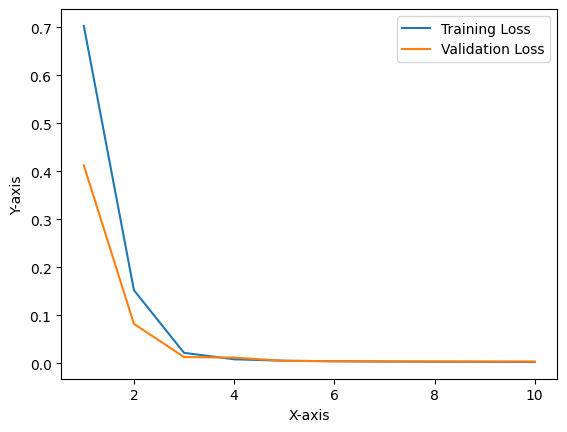

In [23]:
# prompt: plot a graph of following data:
# 1   0.702900	0.412326
# 2	0.152200	0.082027
# 3	0.021600	0.012879
# 4	0.008200	0.011686
# 5	0.005200	0.004955
# 6	0.004100	0.004149
# 7	0.003500	0.003836
# 8	0.003100	0.003733
# 9	0.002900	0.003627
# 10	0.002700	0.003622

import matplotlib.pyplot as plt

# Data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y1 = [0.702900, 0.152200, 0.021600, 0.008200, 0.005200, 0.004100, 0.003500, 0.003100, 0.002900, 0.002700]
y2 = [0.412326, 0.082027, 0.012879, 0.011686, 0.004955, 0.004149, 0.003836, 0.003733, 0.003627, 0.003622]

# Plotting
plt.plot(x, y1, label="Training Loss")
plt.plot(x, y2, label="Validation Loss")

# Adding labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

In [ ]:
# 8. Получение предсказаний на валидационном наборе
predictions = trainer.predict(eval_encoded)  # Используем eval_encoded
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Настоящие метки из eval_dataset
true_labels = eval_dataset["labels"]

# 9. Оценка качества классификации
print(classification_report(
    true_labels,
    predicted_labels,
    target_names=["Претензия", "Предложение", "Благодарность"],
    zero_division=0
))

               precision    recall  f1-score   support

    Претензия       1.00      1.00      1.00        28
  Предложение       1.00      1.00      1.00        28
Благодарность       1.00      1.00      1.00        28

     accuracy                           1.00        84
    macro avg       1.00      1.00      1.00        84
 weighted avg       1.00      1.00      1.00        84



In [ ]:
from collections import Counter

# Подсчет примеров в каждой категории
print(Counter(train_dataset["labels"]))
print(Counter(predicted_labels))
probabilities = predictions.predictions  # Вероятности для каждого класса
print(probabilities[:5])  # Посмотреть первые 5 строк

Counter({0: 115, 2: 112, 1: 109})
Counter({1: 28, 2: 28, 0: 28})
[[-2.419004   4.408874  -2.2752738]
 [-2.43021   -2.2530484  4.7402425]
 [-2.395019   4.4203725 -2.318798 ]
 [-2.5258193 -2.2053206  4.71223  ]
 [-2.460894  -2.2283852  4.7362494]]


In [ ]:
incorrect_predictions = [
    (true, pred, text)
    for true, pred, text in zip(true_labels, predicted_labels, eval_texts)
    if true != pred
]
for true, pred, text in incorrect_predictions:
    print(f"True: {true}, Predicted: {pred}, Text: {text}")

In [11]:
from transformers import pipeline

# Загрузка обученной модели и токенизатора
model_path = "./drive/MyDrive/Esenin colab/finetuned_rubert"  # Путь к вашей обученной модели
classifier = pipeline("text-classification", model=model_path, tokenizer=model_path)

# Пример использования
def classify_feedback(feedbacks):
    """
    Классификация списка отзывов по категориям.
    :param feedbacks: List[str] - Список текстов отзывов
    :return: List[Dict] - Список классификаций с вероятностями
    """
    results = classifier(feedbacks)
    return [
        {
            "text": feedback,
            "label": result["label"],
            "score": round(result["score"], 2)  # Удобное округление вероятности
        }
        for feedback, result in zip(feedbacks, results)
    ]


Device set to use cpu


In [19]:
# Пример отзывов
feedbacks = [
    # "Товар доставили поздно",
    # "Добавьте больше вариантов доставки",
    # "Спасибо за быстрое обслуживание",
    # "Качество товара меня полностью устраивает",
    # "Почему так долго обрабатывается заказ?",
    # "Может быть, вы добавите поддержку мобильного приложения?",
    """
    Прошу регуляторно надзирательные органы в части контроля за кредитными организациями обратить внимание на мой отзыв!
    И на банк в целом и в особенности на «флагманский» офис «ДО Китай-город» .
    Сегодня 06.12.24 я была в качестве клиента банка и ожидая свою очередь стала невольной свидетельницей возможного серьезного нарушения!
    Мною Замечено возможное нарушение законодательного порядка в части идентификации клиентов банка , а именно: Пока я сидела в очереди я услышала разговор сотрудницы работающей в окне 3 (не знаю ее имени) и клиента который был на обслуживании в ее окне. Сотрудница попросила клиента предъявить паспорт , на что клиент дал ей свое водительское удостоверение,но сотрудница все еще требовала паспорт.
    Клиент отказывался давать сотруднице свой паспорт , мотивируя это тем, что он волнуется за свои персональные данные и «клиент всегда прав», сотрудница при этом сказала что паспорт как единственный документ удостоверяющий личность они обязаны проверять на специальном приборе на предмет того не поддельный ли он и так далее.
    Далее я отвлеклась на телефон и пропустила часть их диалога ( очень жаль!) и включилась обратно в процесс на том, что сотрудница (вместе с Елизаветой из окна 2) консультировали клиента по вопросу управляющей компании (из диалога мне стало понятно, что клиент владеет ценными бумагами и является клиентом VIP сегмента orange premium club.
    Сотрудница уточняла у клиента что-то связанное с цифрами на его счете и все это было ПОСЛЕ того как клиента просили дать паспорт и он отказался. Прошу провести производственную проверку сотрудников «ДО Китай город» на предмет данного инцидента потенциально влекущего за собой операционные , финансовые и регуляторые риски для клиента в первую очередь!
    Такая работа недопустима!
    ну и конечно раз уж такие нарушения могут быть , то остальное уже кажется иголкой в стогу сена :
    2) Я прождала очередь по своему талону более 1,5 часов ввиду того что сотрудница Елизавета (окно 2) забирала других клиентов без очереди при этом делала им замечания но не просила покинуть окно и продолжала обслуживание.
    3) Сотрудницы умудрились потерять мой талон с номером ПКО (зачем-то номер ордера они пишут ручкой на талонах по которым вызывают клиентов) за два шага от окна до кассы без которого не смогли мне внести деньги на счет и требовали его с меня.
    Я начала возмущаться на счет того что сотрудники банка вводят меня как клиента в заблуждение , на что услышав Елизавета пришла и начала угрожать мне что позовет охрану и нажмет тревожную кнопку.
    """,
    """
    Добрый день!
    Хочу выразить искреннюю благодарность сотруднику Р-вой Марии Б. - управляющему ДО «Победа» в г. Самара по адресу ул. Победы, д. 92 за ее компетентность, доброжелательность, за неравнодушие и умение работать с клиентами.
    12.11.2024г я письменно обратилась в ПСБ с вопросом о том, почему условия открытого мной вклада в Договоре различаются с условиями этого же вклада в мобильном банке. Клиентский отдел Приволжского филиала ПАС ПСБ, куда были направлены мои письменные запросы, ограничился формальными отписками – цитатой из условий, предусмотренных Договором, но не объясняющих конкретную ситуацию.
    Мария Б. – единственный сотрудник, который досконально разобрался в интересующем меня вопросе, поняв его суть. Именно она нашла в документах ПСБ объяснение данной ситуации.
    Спасибо Вам, Мария Б.!
    """,
    """
    Четыре дня назад получила дебетовую карту ПСБ (доставка курьером) Карта не активирована до сих пор ("не может быть использована для входа", т.к.
    курьер не передал сведения в отделение банка") Повторные обращения в службу поддержки - без эффекта! Полная несостоятельность курьерской службы и службы поддержки! Позор!
    """,
    """
    Добрый день. Недавно узнал, что в Промсвязьбанке проходит акция "мой суперприз". И решил обратится 18 декабря 2024 года в 13-50 в чат банка за подробными разъяснениями по данной акции.
    Оператор Карина моментально подключилась к диалогу, вежливо поздоровалась со мной и предоставила мне все необходимые разъяснения по данному вопросу. Также она включила меня в данную акцию непосредственно в чате. А также дала всю необходимую информацию, какой именно я должен открыть вклад и на какой срок, чтобы соблюсти все условия данной акции.
    На оставшиеся мои вопросы ответила оператор Вероника и помогла мне окончательно разобраться в данном вопросе. Спасибо большое за оперативную и грамотную консультацию. Сам бы я не разобрался.
    """,
    """
    Оформил кредитку 100+. Из преимуществ - реальные 100 дней грейс-периода (на покупки, разумеется, никакого снятия наличных или переводов - на них будут начисляться проценты - учтите это!). Это сейчас не у многих банков, если детально прям разобраться. Но, спросил в чате поддержки, где и как увидеть срок окончания льготного периода? Привык в свое время с аналогичной картой Альфы: льготный период с такого-то по такое-то, начало и окончание четко видны в приложении. Вот и тут ждал чего-то подобного... А оператор отвечает (прям, процитирую): "Проверила информацию. На текущий момент дата завершения льготного периода по вашей карте - 05.09.2024г.
    Информация о завершении льготного периода в личном кабинете отображается только в том месяце, когда истекает льготный период.". Ладно, у меня лимит - 2/3 зарплаты. Теоретически, проблем возникнуть не должно. Но, во-первых, на ту же зп могут быть свои планы, никак не связанные с погашением долга по кредитке, во-вторых, а если б лимит был три зарплаты? Вот, узнаю я первого сентября, что у меня долг 2,5 зарплаты (допустим, до этого платил только минималки), а пятого заканчивается грейс-период. И, что делать??? В общем, как-то не понял я, зачем скрывать от клиента дату окончания грейса, не давая ему планировать выход на эту дату, и создавая таким образом для него дополнительные финансовые риски. Поэтому, карту в начале июня закрою. А читателям просто советую иметь вышеизложенное в виду.
    """,
    "Хочу выразить недовольство работой горячей линии банка ПСБ. Я пытался связаться с оператором, чтобы уточнить детали по кредитному договору, но мне пришлось ждать более 30 минут, прежде чем меня соединили. Когда наконец удалось поговорить с сотрудником, его ответы были настолько общими, что я не получил конкретной информации, за которой обратился. В итоге мне пришлось идти в отделение, чтобы решить вопрос, что заняло ещё несколько часов. Очень надеюсь, что вы пересмотрите организацию работы горячей линии, чтобы подобные ситуации не повторялись.",
    "Хотелось бы предложить банку ПСБ улучшить функционал мобильного приложения. Например, было бы полезно добавить возможность гибкого планирования бюджета с автоматическим распределением расходов по категориям. Это помогло бы клиентам лучше контролировать свои финансы и видеть, куда уходят деньги. Также не хватает функции предустановки шаблонов для частых платежей, чтобы не вводить данные вручную каждый раз. Такие обновления сделали бы приложение ещё более удобным и полезным в повседневной жизни.",
    "Хочу выразить огромную благодарность сотрудникам банка ПСБ за помощь в сложной ситуации. У меня произошла ошибка при переводе крупной суммы, и деньги ушли не на тот счёт. Я сразу обратился в службу поддержки, и сотрудники не только оперативно приняли мой запрос, но и подробно объяснили, какие шаги нужно предпринять, чтобы вернуть средства. Уже через два дня деньги были возвращены на мой счёт, а весь процесс сопровождался профессиональной консультацией. Очень рад, что выбрал ваш банк — здесь работают настоящие профессионалы!",
    "Очень разочарован качеством обслуживания в отделении банка ПСБ. Недавно пришёл, чтобы открыть счёт, и столкнулся с неорганизованной работой сотрудников. Во-первых, очередь двигалась крайне медленно, хотя работало только два окна из пяти. Во-вторых, сотрудник, который занимался моим запросом, постоянно отвлекался на разговоры с коллегами, из-за чего процедура открытия счёта заняла гораздо больше времени, чем я рассчитывал. В итоге мне пришлось вернуться на следующий день, так как в первый раз не успели завершить все операции. Надеюсь, руководство банка обратит внимание на подобные ситуации и примет меры для улучшения качества обслуживания.",
]

# Классификация отзывов
classified_feedbacks = classify_feedback(feedbacks)

# Печать результатов
for feedback in classified_feedbacks:
    print(f"Отзыв: {feedback['text']}")
    print(f"Категория: {feedback['label']}, Уверенность: {feedback['score']}\n")


Отзыв: 
    Прошу регуляторно надзирательные органы в части контроля за кредитными организациями обратить внимание на мой отзыв!
    И на банк в целом и в особенности на «флагманский» офис «ДО Китай-город» .
    Сегодня 06.12.24 я была в качестве клиента банка и ожидая свою очередь стала невольной свидетельницей возможного серьезного нарушения!
    Мною Замечено возможное нарушение законодательного порядка в части идентификации клиентов банка , а именно: Пока я сидела в очереди я услышала разговор сотрудницы работающей в окне 3 (не знаю ее имени) и клиента который был на обслуживании в ее окне. Сотрудница попросила клиента предъявить паспорт , на что клиент дал ей свое водительское удостоверение,но сотрудница все еще требовала паспорт.
    Клиент отказывался давать сотруднице свой паспорт , мотивируя это тем, что он волнуется за свои персональные данные и «клиент всегда прав», сотрудница при этом сказала что паспорт как единственный документ удостоверяющий личность они обязаны проверят

# Test

In [12]:
def preprocessing(json_data):
    text = json_data['text'].replace('\n', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('<p>', '')
    text = text.replace('</p>', '')
    text = text.replace('<ul>', '')
    text = text.replace('<li>', '')
    while '  ' in text:
        text = text.replace('  ', ' ')
    text = text.strip()
    if len(text) > 512:
        text = text[:512]
    return text

In [13]:
def load_json_data(filepath):
    try:
        with open(filepath, 'r', encoding='utf-8') as file:
            json_data = json.load(file)
            return json_data
    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found.")
        return None
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in '{filepath}'.")
        return None

In [14]:
# Example usage
json_data = load_json_data('./drive/MyDrive/Esenin colab/finetuned_rubert/reviews_bankiru_promsvyazbank.json')
if json_data:
    print(preprocessing(json_data[0]))

Добрый день. Недавно узнал, что в Промсвязьбанке проходит акция "мой суперприз". И решил обратится 18 декабря 2024 года в 13-50 в чат банка за подробными разъяснениями по данной акции. Оператор Карина моментально подключилась к диалогу, вежливо поздоровалась со мной и предоставила мне все необходимые разъяснения по данному вопросу. Также она включила меня в данную акцию непосредственно в чате. А также дала всю необходимую информацию, какой именно я должен открыть вклад и на какой срок, чтобы соблюсти все ус


In [18]:
json_data[0]

{'title': 'Консультация в чате банка по акции «мой суперприз»',
 'userName': 'user-47287494153',
 'text': '<p>Добрый день. Недавно узнал, что в Промсвязьбанке проходит акция "мой суперприз". И решил обратится 18 декабря 2024 года в 13-50 в чат банка за подробными разъяснениями по данной акции. \r\n\r\nОператор Карина моментально подключилась к диалогу, вежливо поздоровалась со мной и предоставила мне все необходимые разъяснения по данному вопросу. Также она включила меня в данную акцию непосредственно в чате. А также дала всю необходимую информацию, какой именно я должен открыть вклад и на какой срок, чтобы соблюсти все условия данной акции.</p>\r\n<p>На оставшиеся мои вопросы ответила оператор Вероника и помогла мне окончательно разобраться в данном вопросе. Спасибо большое за оперативную и грамотную консультацию. Сам бы я не разобрался.</p>\r\n<p></p>',
 'grade': 5,
 'dateCreate': '2024-12-18 14:28:34'}

In [25]:
# prompt: get the texts from json_data with preprocessing and pass them to classify_feedback. Print the output correspondingly for feedback['label']: LABEL_0 is "Претензия", LABEL_1 is "Предложение", LABEL_2 is "Благодарность"

LABEL_0 = "Претензия"
LABEL_1 = "Предложение"
LABEL_2 = "Благодарность"

# Example usage
# json_data = load_json_data('./drive/MyDrive/Esenin colab/finetuned_rubert/reviews_bankiru_promsvyazbank.json')
json_data = load_json_data('./drive/MyDrive/Esenin colab/real_feedback123.json')
result = []
# json_data = json_data[:100] # !@#%!#$%!#%#$%#@$%!#!#$!%!#$%!#
texts_to_classify = []
for item in json_data:
    texts_to_classify.append(preprocessing(item))

classified_feedbacks = classify_feedback(texts_to_classify)

resmet = []
for feedback, item in zip(classified_feedbacks, json_data):
    label_mapping = {
        "LABEL_0": LABEL_0,
        "LABEL_1": LABEL_1,
        "LABEL_2": LABEL_2
    }
    resmet.append(label_mapping.get(feedback['label'], 'Unknown'))
    # result.append({
    #     'grade': item['grade'],
    #     'dateCreate': item['dateCreate'],
    #     'label': label_mapping.get(feedback['label'], 'Unknown')})
    # print(f"Отзыв: {feedback['text']}")
    # print(f"Категория: {label_mapping.get(feedback['label'], 'Unknown')}, Уверенность: {feedback['score']}\n")


In [27]:
# prompt: compare predicted `resmet` values and the truth values from `json_data['label']`. Compute the accuracy

from sklearn.metrics import accuracy_score

# Assuming 'resmet' and 'json_data' are defined as in the previous code

true_labels = [item['label'] for item in json_data]
accuracy = accuracy_score(true_labels, resmet)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7818181818181818


In [ ]:
with open('./drive/MyDrive/Esenin colab/labeled_reviews.json', 'w', encoding='utf-8') as f:
    json.dump(result, f, ensure_ascii=False, indent=4)
